# Video Game Price Prediction

This notebook demonstrates comprehensive exploratory data analysis (EDA) and preprocessing techniques for the video game dataset. The goal is to predict the Original Price of video games.

In [102]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Loading and Exploring the Dataset

In [103]:
# Load the dataset
# Set the file path
file_path = 'C:/Users/Lenovo/Downloads/merged_data.csv/merged_data.csv'  

# Load the dataset
df = pd.read_csv(file_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (71700, 16)


,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,$29.99,$29.99,"3 Aug, 2023",https://store.steampowered.com/app/1086940/Bal...,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,$14.99,$14.99,"21 Aug, 2012",https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | Windows® 7/Vista/XP | Processor: | Int...
2,Apex Legends™,Free,Free,"4 Nov, 2020",https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,$34.78,$17.39,"8 Nov, 2021",https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty®,Free,Free,"27 Oct, 2022",https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...


In [104]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71700 entries, 0 to 71699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   71699 non-null  object
 1   Original Price          71700 non-null  object
 2   Discounted Price        71700 non-null  object
 3   Release Date            71569 non-null  object
 4   Link                    71700 non-null  object
 5   Game Description        71489 non-null  object
 6   Recent Reviews Summary  56480 non-null  object
 7   All Reviews Summary     5371 non-null   object
 8   Recent Reviews Number   56480 non-null  object
 9   All Reviews Number      5371 non-null   object
 10  Developer               71479 non-null  object
 11  Publisher               71183 non-null  object
 12  Supported Languages     71700 non-null  object
 13  Popular Tags            71700 non-null  object
 14  Game Features           71700 non-null  object
 15  Mi

In [105]:
# Calculate missing values percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': missing_percentage
})
missing_data.sort_values('Percentage', ascending=False)

,Missing Values,Percentage
All Reviews Summary,66329,92.509066
All Reviews Number,66329,92.509066
Recent Reviews Summary,15220,21.227336
Recent Reviews Number,15220,21.227336
Minimum Requirements,1124,1.567643
Publisher,517,0.721060
Developer,221,0.308229
Game Description,211,0.294282
Release Date,131,0.182706
Title,1,0.001395


In [106]:
df.drop(columns=['All Reviews Summary','All Reviews Number','Link'], inplace=True, errors='ignore')

## 2. Exploratory Data Analysis
Let's explore our target variable and its relationships with other features.

In [107]:
df.describe(include='all').T

,count,unique,top,freq
Title,71699,71699,Baldur's Gate 3,1
Original Price,71700,654,Free,17585
Discounted Price,71700,827,Free,17585
Release Date,71569,4441,Coming soon,5887
Game Description,71489,71090,Find the objects that are hidden on the map.,34
Recent Reviews Summary,56480,18,Very Positive,11039
Recent Reviews Number,56480,13391,- Need more user reviews to generate a score,18999
Developer,71479,45353,Choice of Games,162
Publisher,71183,38543,Big Fish Games,459
Supported Languages,71700,11058,['English'],38083


In [108]:
# Convert price columns to numeric and replace "Free" with 0
for col in ['Original Price', 'Discounted Price']:
    if df[col].dtype == 'object':
        df[col] = df[col].replace('Free', '0')  # Replace "Free" with 0
        df[col] = df[col].str.replace('[$,]', '', regex=True).astype(float)

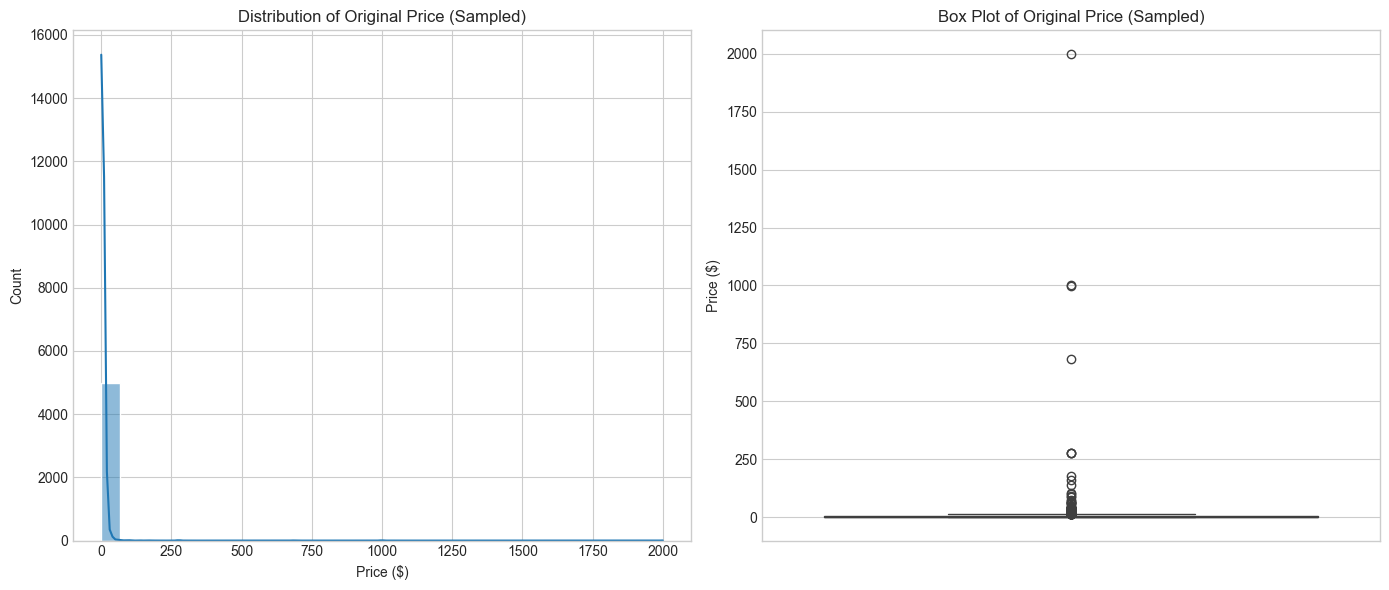

In [109]:
# Optimize by sampling the dataset for visualization
df_sample = df.sample(n=5000, random_state=42)  # Sample 5000 rows for faster visualization

# Analyze the target variable: Original Price
plt.figure(figsize=(14, 6))

# Histogram of Original Price
plt.subplot(1, 2, 1)
sns.histplot(df_sample['Original Price'].dropna(), kde=True, bins=30)  # Add bins for better performance
plt.title('Distribution of Original Price (Sampled)')
plt.xlabel('Price ($)')

# Box plot of Original Price
plt.subplot(1, 2, 2)
sns.boxplot(y=df_sample['Original Price'].dropna())
plt.title('Box Plot of Original Price (Sampled)')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

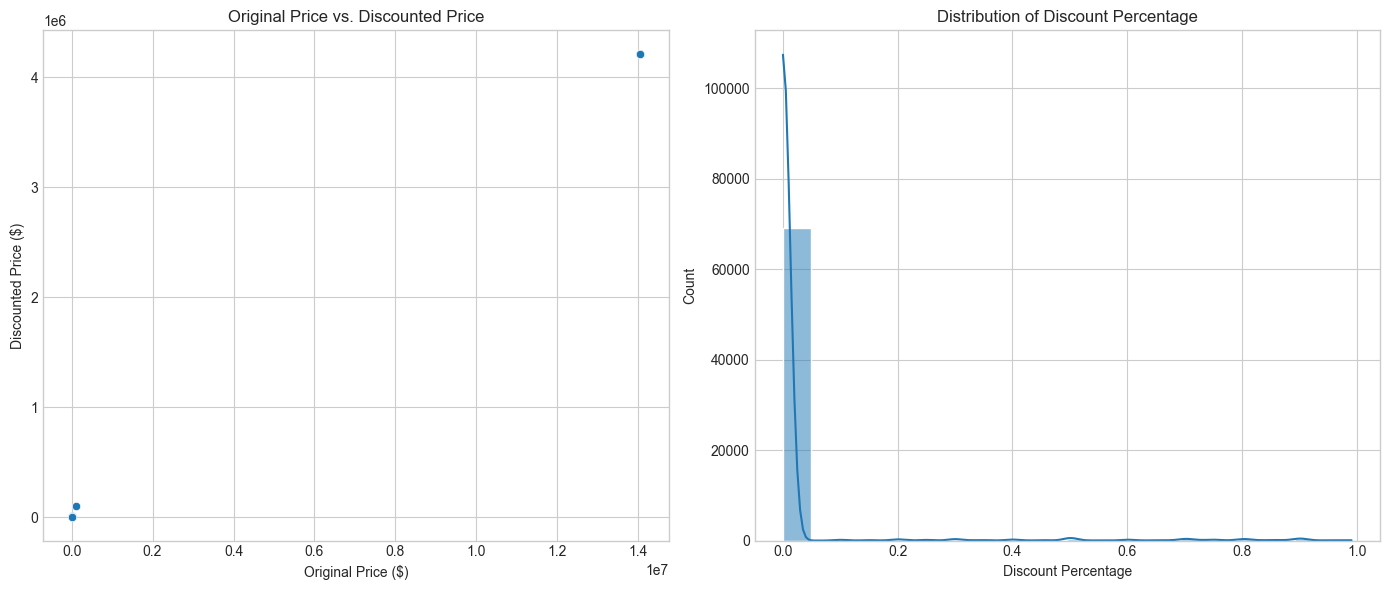

In [110]:
# Analyze the relationship between Original Price and Discounted Price
plt.figure(figsize=(14, 6))

# Scatter plot of Original Price vs. Discounted Price
plt.subplot(1, 2, 1)
sns.scatterplot(x='Original Price', y='Discounted Price', data=df)
plt.title('Original Price vs. Discounted Price')
plt.xlabel('Original Price ($)')
plt.ylabel('Discounted Price ($)')

# Create discount percentage
df['Discount Percentage'] = ((df['Original Price'] - df['Discounted Price']) / df['Original Price']).fillna(0)

# Histogram of Discount Percentage
plt.subplot(1, 2, 2)
sns.histplot(df['Discount Percentage'].clip(0, 1), bins=20, kde=True)
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')

plt.tight_layout()
plt.show()

In [111]:
# Convert Release Date to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Create temporal features
df['Release Year'] = df['Release Date'].dt.year
df['Release Month'] = df['Release Date'].dt.month
df['Game Age'] = (pd.Timestamp.now() - df['Release Date']).dt.days // 365

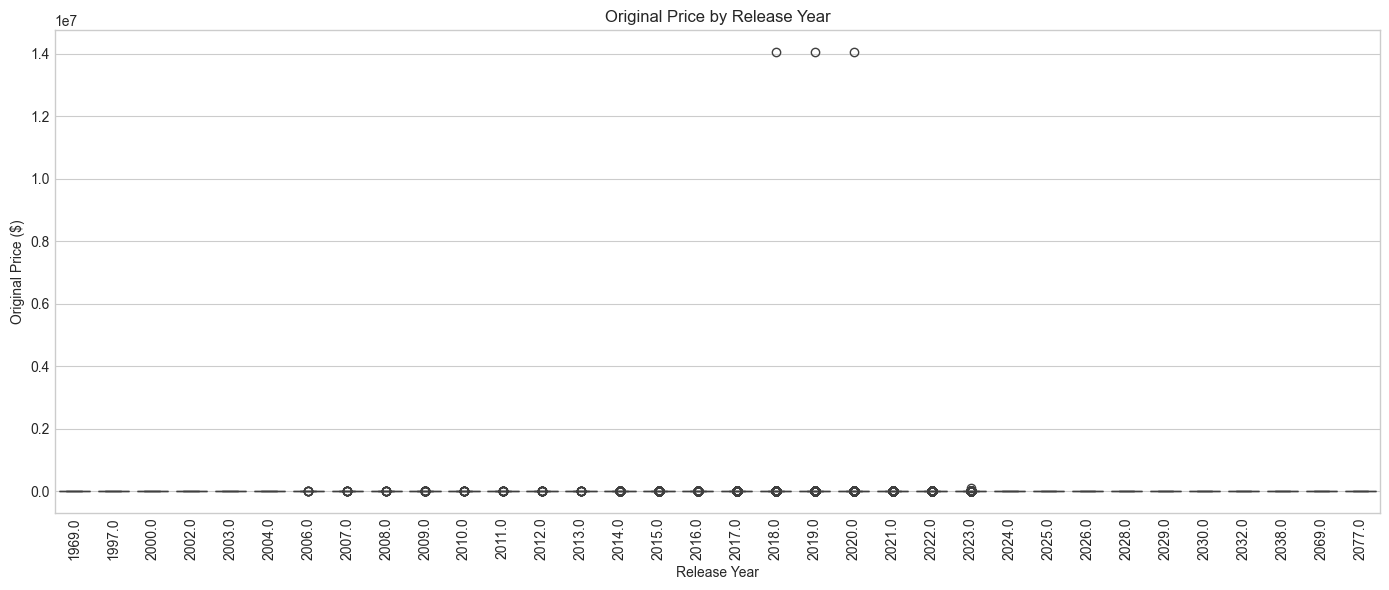

In [112]:
# Analyze the relationship between price and release year
plt.figure(figsize=(14, 6))

# Box plot of Original Price by Release Year
ax = sns.boxplot(x='Release Year', y='Original Price', data=df)
plt.title('Original Price by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Original Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

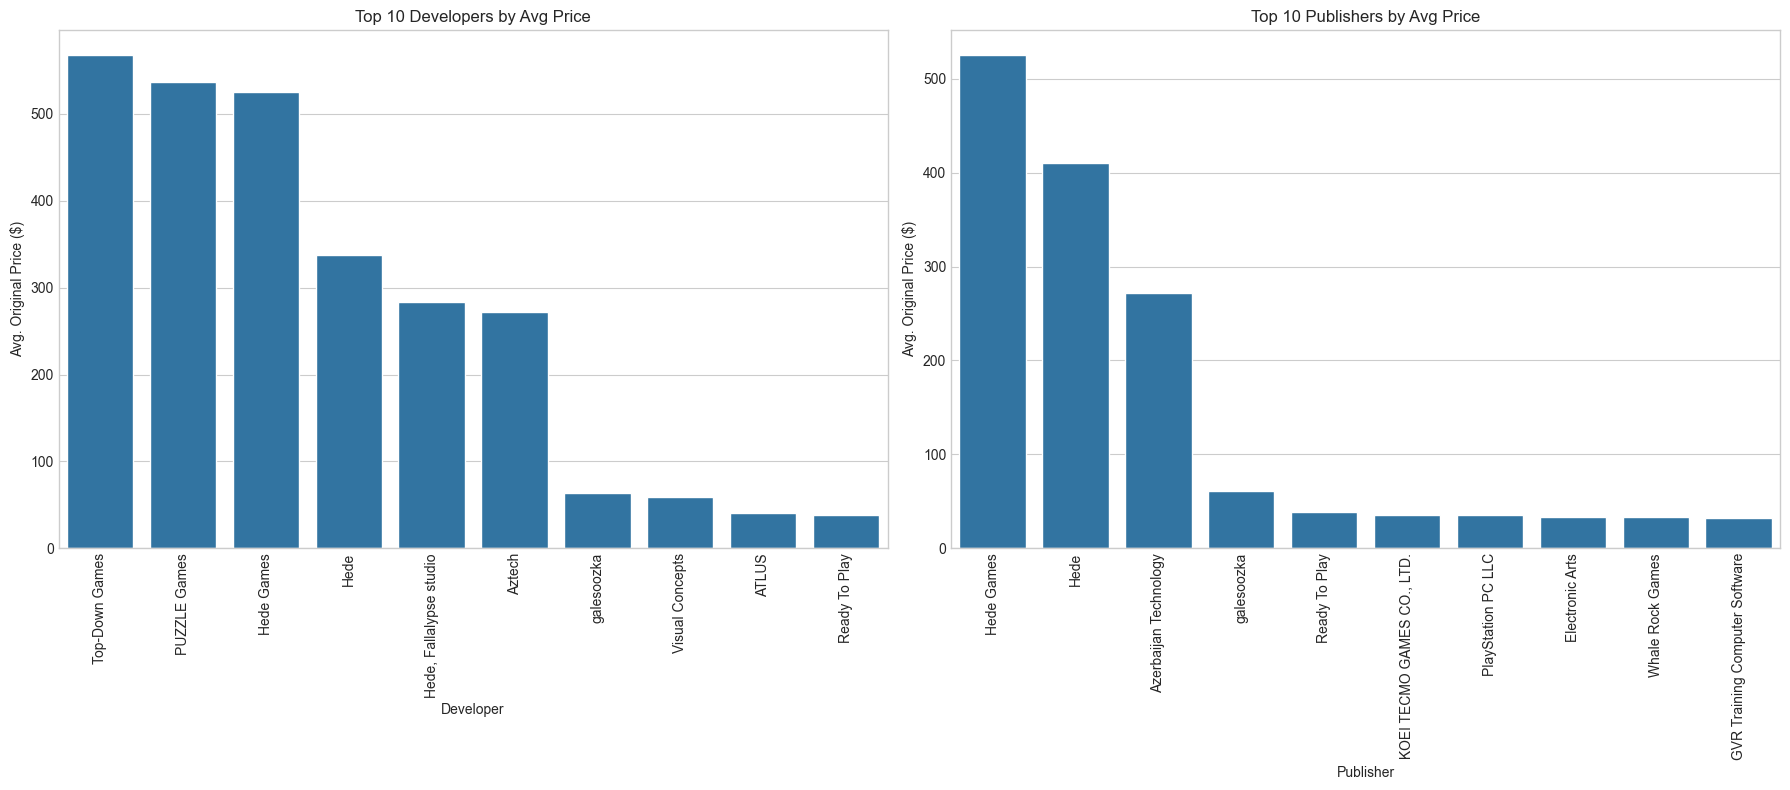

In [113]:
# Analyze top developers and publishers
plt.figure(figsize=(18, 8))

# Top 10 Developers by average price
plt.subplot(1, 2, 1)
top_devs = df.groupby('Developer')['Original Price'].agg([np.mean, 'count']).sort_values('mean', ascending=False)
top_devs = top_devs[top_devs['count'] > 5].head(10)
sns.barplot(x=top_devs.index, y='mean', data=top_devs)
plt.title('Top 10 Developers by Avg Price')
plt.xticks(rotation=90)
plt.ylabel('Avg. Original Price ($)')

# Top 10 Publishers by average price
plt.subplot(1, 2, 2)
top_pubs = df.groupby('Publisher')['Original Price'].agg([np.mean, 'count']).sort_values('mean', ascending=False)
top_pubs = top_pubs[top_pubs['count'] > 5].head(10)
sns.barplot(x=top_pubs.index, y='mean', data=top_pubs)
plt.title('Top 10 Publishers by Avg Price')
plt.xticks(rotation=90)
plt.ylabel('Avg. Original Price ($)')

plt.tight_layout()
plt.show()

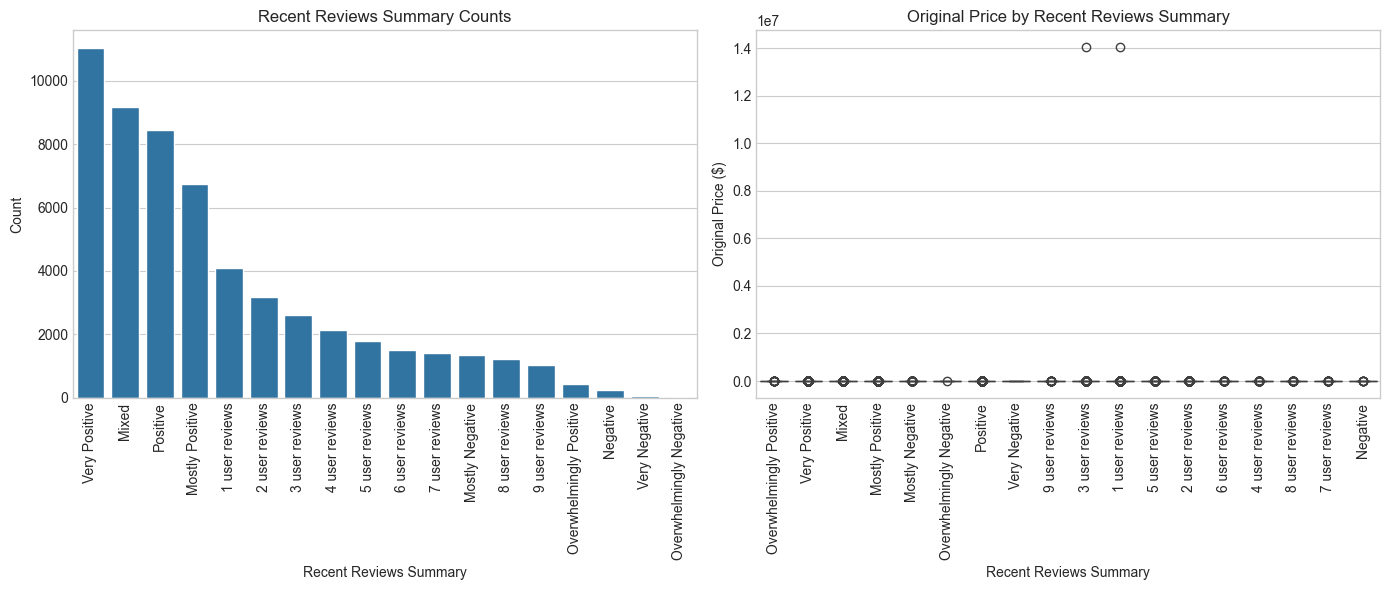

In [114]:
# Review summaries and their relationship with price
if 'Recent Reviews Summary' in df.columns:
    review_summary_counts = df['Recent Reviews Summary'].value_counts()
    plt.figure(figsize=(14, 6))
    
    # Bar plot of review summary counts
    plt.subplot(1, 2, 1)
    sns.barplot(x=review_summary_counts.index, y=review_summary_counts.values)
    plt.title('Recent Reviews Summary Counts')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    
    # Box plot of Original Price by Recent Reviews Summary
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Recent Reviews Summary', y='Original Price', data=df)
    plt.title('Original Price by Recent Reviews Summary')
    plt.xticks(rotation=90)
    plt.ylabel('Original Price ($)')
    
    plt.tight_layout()
    plt.show()

### Handling Outliers with Fixed Thresholds (Below 0 and Above 60) ###

1. Ensuring correct datatypes for numeric columns:
Original Price datatype: float64
Discounted Price datatype: float64
Converting Recent Reviews Number to numeric...

2. Removing outliers with fixed thresholds (below 0 and above 60):

===== Outliers in 'Original Price' using fixed thresholds =====
Range for normal values: [0.00, 60.00]
Total outliers: 220 (0.31% of data)
Low outliers: 0 values < 0.00
High outliers: 220 values > 60.00

Outlier Statistics:
           Outliers  Normal Values
count  2.200000e+02   71480.000000
mean   1.923273e+05       4.269209
std    1.632673e+06       5.464219
min    6.077000e+01       0.000000
25%    8.999000e+01       0.790000
50%    1.566850e+02       2.790000
75%    3.599600e+02       6.290000
max    1.404633e+07      59.990000

Sample of outliers (showing up to 5):
       Original Price                          Title           Developer  \
38643          139.00                  

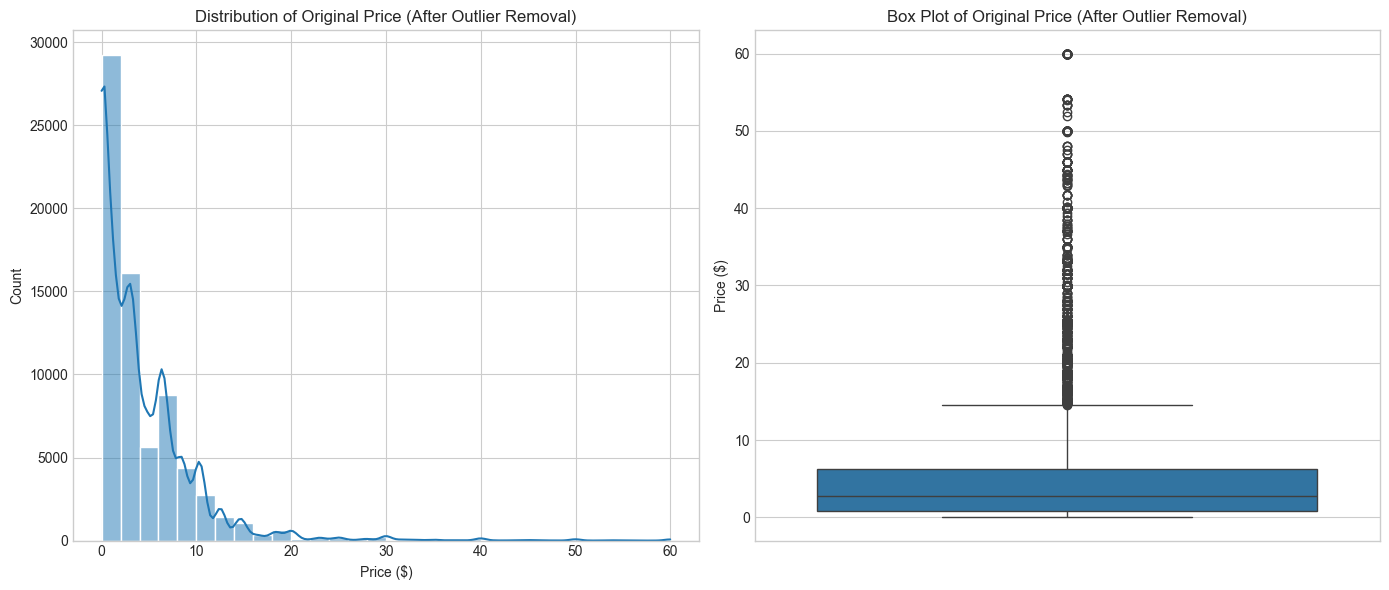


=== Additional Outlier Analysis ===

Top developers with outliers:
Developer
Hede                       39
Top-Down Games             16
Hede Games                 16
Aztech                     13
PUZZLE Games               10
galesoozka                 10
StaplesVR                   4
Whale Rock Games            4
Hede, Fallalypse studio     4
Hede, Hexaluga mines        4
Name: count, dtype: int64

Outliers by release year:
Release Year
2011.0     1
2012.0     1
2013.0     1
2014.0     1
2015.0     1
2016.0     2
2017.0     1
2018.0    18
2019.0     9
2020.0    21
2021.0    50
2022.0    64
2023.0    48
Name: count, dtype: int64

Dataset shape after cleaning: (71480, 17)


In [115]:
# Function to remove extreme outliers with fixed thresholds and detailed analysis
def remove_fixed_threshold_outliers(df, columns=None, lower_threshold=0, upper_threshold=60, 
                            print_sample_size=5, save_outliers=False):
    """
    Removes outliers based on fixed thresholds from numeric columns in a DataFrame with detailed analysis.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        columns (list): List of columns to check (if None, uses all numeric columns)
        lower_threshold (float): Fixed lower threshold (default: 0)
        upper_threshold (float): Fixed upper threshold (default: 60)
        print_sample_size (int): Number of outlier samples to print (default: 5)
        save_outliers (bool): Whether to return outliers DataFrame (default: False)
        
    Returns:
        pd.DataFrame or tuple: DataFrame with outliers removed, optionally also outliers DataFrame
    """
    # Create a copy of the DataFrame
    df_clean = df.copy()
    
    # Store all outliers if requested
    all_outliers = pd.DataFrame()
    
    # If no specific columns are provided, use all numeric columns
    if columns is None:
        columns = df_clean.select_dtypes(include=['number']).columns
    
    # Keep track of outliers removed
    total_removed = 0
    initial_count = len(df_clean)
    
    # Process each column
    for col in columns:
        # Skip columns with zero variance
        if df_clean[col].min() == df_clean[col].max():
            continue
            
        # Use fixed thresholds instead of percentiles
        lower_bound = lower_threshold
        upper_bound = upper_threshold
        
        # Identify outliers
        low_outliers = df_clean[df_clean[col] < lower_bound]
        high_outliers = df_clean[df_clean[col] > upper_bound]
        outliers = pd.concat([low_outliers, high_outliers])
        
        if len(outliers) > 0:
            # Add to all outliers if saving
            if save_outliers:
                # Add a column indicating which feature caused the outlier classification
                outliers['outlier_feature'] = col
                all_outliers = pd.concat([all_outliers, outliers])
            
            # Print outlier information
            print(f"\n===== Outliers in '{col}' using fixed thresholds =====")
            print(f"Range for normal values: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"Total outliers: {len(outliers)} ({len(outliers)/len(df_clean):.2%} of data)")
            print(f"Low outliers: {len(low_outliers)} values < {lower_bound:.2f}")
            print(f"High outliers: {len(high_outliers)} values > {upper_bound:.2f}")
            
            # Print summary statistics
            print("\nOutlier Statistics:")
            outlier_stats = outliers[col].describe()
            normal_stats = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)][col].describe()
            
            stats_df = pd.DataFrame({
                'Outliers': outlier_stats,
                'Normal Values': normal_stats
            })
            print(stats_df)
            
            # Print sample of outliers
            if len(outliers) > 0:
                print(f"\nSample of outliers (showing up to {print_sample_size}):")
                # Show relevant columns based on what's available in the dataset
                display_cols = [col]
                
                # Try to add context columns if they exist
                context_cols = ['Title', 'Developer', 'Publisher', 'Release Year']
                for context_col in context_cols:
                    if context_col in outliers.columns:
                        display_cols.append(context_col)
                
                # Display sample with formatting
                pd.set_option('display.max_colwidth', 30)  # Limit column width for display
                print(outliers[display_cols].sample(min(print_sample_size, len(outliers))).sort_values(col))
                pd.reset_option('display.max_colwidth')
                
            # Remove outliers
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    # Report how many rows were removed
    total_removed = initial_count - len(df_clean)
    print(f"\nSummary: {total_removed} total rows removed ({total_removed/initial_count:.2%} of data)")
    print(f"Rows remaining: {len(df_clean)}")
    
    if save_outliers and len(all_outliers) > 0:
        # Remove duplicates (a row might be an outlier in multiple columns)
        all_outliers = all_outliers.drop_duplicates()
        print(f"Saved {len(all_outliers)} unique outlier rows")
        return df_clean, all_outliers
    
    return df_clean

# Now use the updated function
print("### Handling Outliers with Fixed Thresholds (Below 0 and Above 60) ###")

# First ensure price columns are correctly converted to numeric
print("\n1. Ensuring correct datatypes for numeric columns:")
for col in ['Original Price', 'Discounted Price']:
    if col in df.columns:
        # Check if conversion has already been done
        if df[col].dtype == 'object':
            print(f"Converting {col} to numeric...")
            df[col] = df[col].replace('Free', '0')
            df[col] = df[col].str.replace('[$,]', '', regex=True).astype(float)
        print(f"{col} datatype: {df[col].dtype}")

# Check for other potential numeric columns with incorrect types
numeric_candidates = ['Recent Reviews Number']
for col in numeric_candidates:
    if col in df.columns and df[col].dtype == 'object':
        print(f"Converting {col} to numeric...")
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Now remove outliers based on fixed thresholds
print("\n2. Removing outliers with fixed thresholds (below 0 and above 60):")
price_columns = ['Original Price', 'Discounted Price']

# Set save_outliers=True to save outliers to a separate DataFrame
df, outliers_df = remove_fixed_threshold_outliers(df, price_columns, 
                                                lower_threshold=0, 
                                                upper_threshold=60, 
                                                save_outliers=True)

# Visualize the data after outlier removal
plt.figure(figsize=(14, 6))

# Histogram of Original Price after cleaning
plt.subplot(1, 2, 1)
sns.histplot(df['Original Price'], kde=True, bins=30)
plt.title('Distribution of Original Price (After Outlier Removal)')
plt.xlabel('Price ($)')

# Box plot of Original Price after cleaning
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Original Price'])
plt.title('Box Plot of Original Price (After Outlier Removal)')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

# Optional: Perform additional analysis on outliers
if len(outliers_df) > 0:
    print("\n=== Additional Outlier Analysis ===")
    
    # Check for patterns in outliers (e.g., by developer, publisher, year)
    if 'Developer' in outliers_df.columns:
        print("\nTop developers with outliers:")
        print(outliers_df['Developer'].value_counts().head(10))
    
    if 'Release Year' in outliers_df.columns:
        print("\nOutliers by release year:")
        print(outliers_df['Release Year'].value_counts().sort_index())

print("\nDataset shape after cleaning:", df.shape)

Visualizing data after outlier handling...


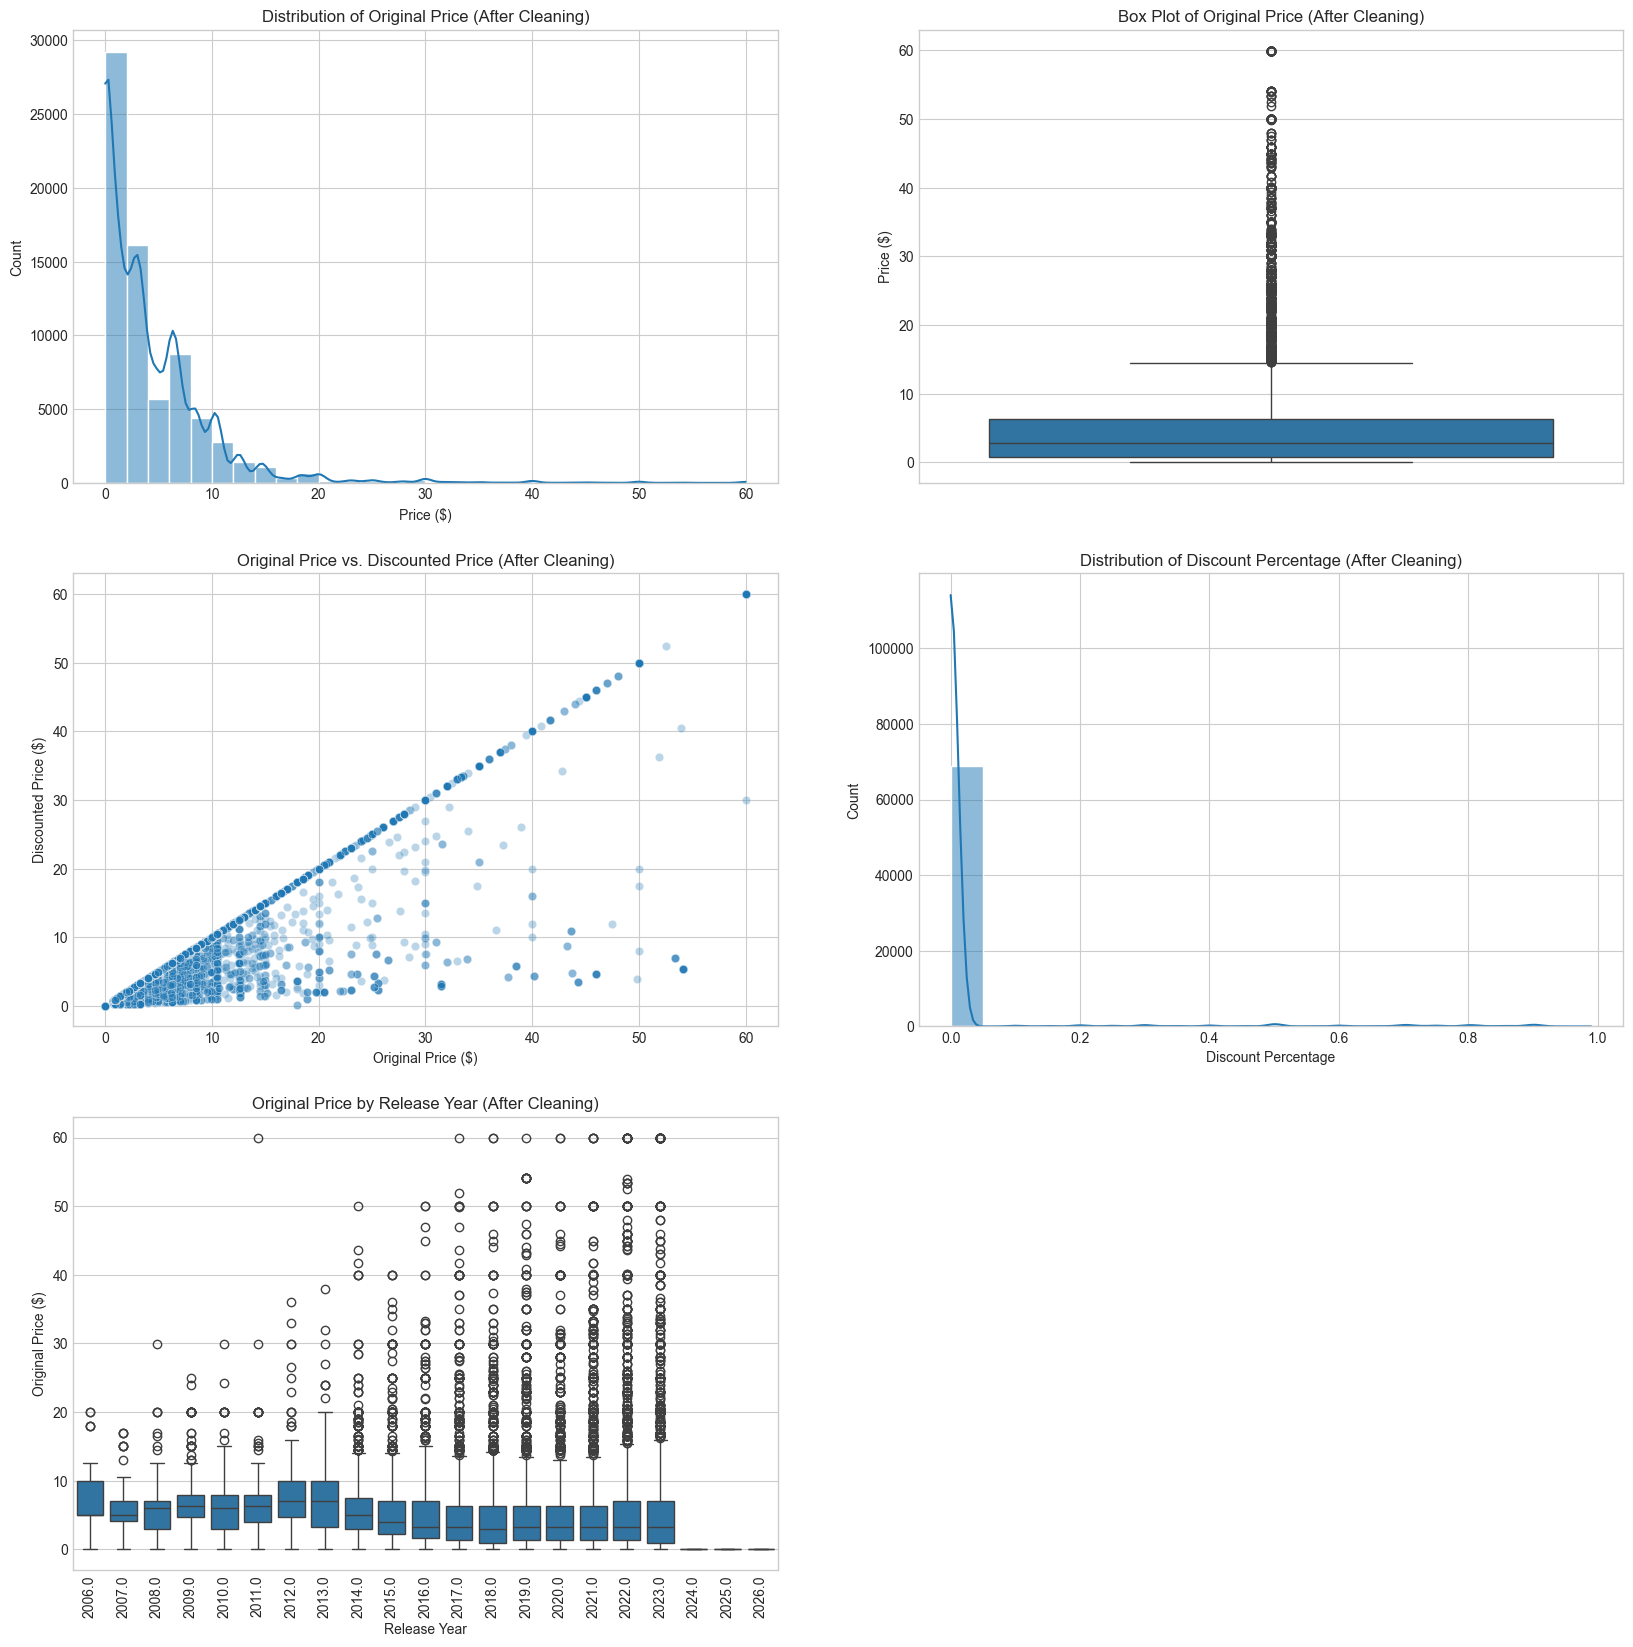

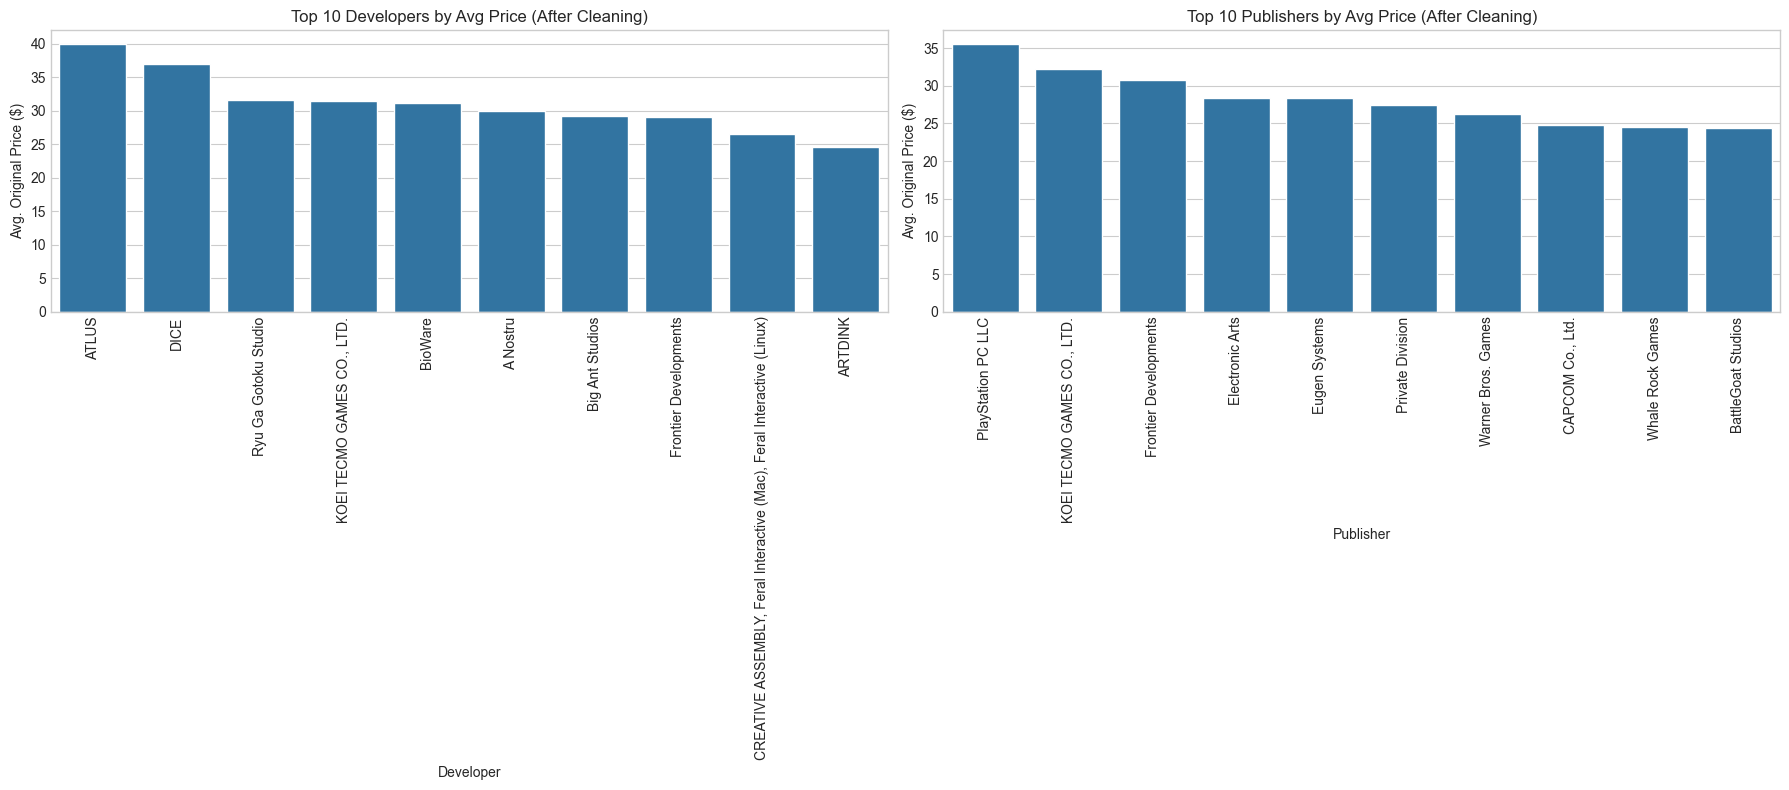

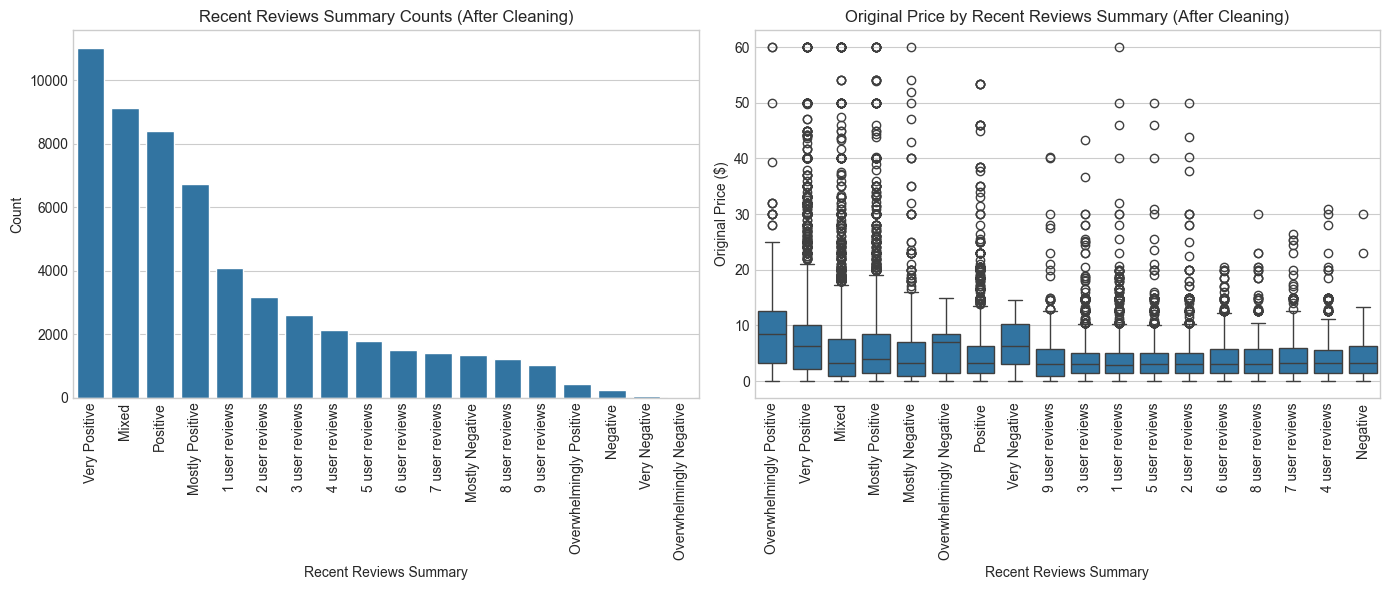


Summary Statistics After Cleaning:
       Original Price  Discounted Price  Discount Percentage
count    71480.000000      71480.000000         71480.000000
mean         4.269209          4.107395             0.019472
std          5.464219          5.230228             0.111598
min          0.000000          0.000000             0.000000
25%          0.790000          0.320000             0.000000
50%          2.790000          2.690000             0.000000
75%          6.290000          6.290000             0.000000
max         59.990000         59.990000             0.989989


In [118]:
def visualize_data_after_cleaning(df):
    """
    Create comprehensive visualizations of the cleaned dataset using the full dataset.
    
    Parameters:
        df: DataFrame with outliers removed
    """
    # Create a figure for visualization
    plt.figure(figsize=(20, 20))
    
    # 1. Distribution of Original Price
    plt.subplot(3, 2, 1)
    sns.histplot(df['Original Price'].dropna(), kde=True, bins=30)
    plt.title('Distribution of Original Price (After Cleaning)')
    plt.xlabel('Price ($)')
    
    # 2. Box plot of Original Price
    plt.subplot(3, 2, 2)
    sns.boxplot(y=df['Original Price'].dropna())
    plt.title('Box Plot of Original Price (After Cleaning)')
    plt.ylabel('Price ($)')
    
    # 3. Original Price vs. Discounted Price
    plt.subplot(3, 2, 3)
    # Use alpha for better visibility with full dataset
    sns.scatterplot(x='Original Price', y='Discounted Price', data=df, alpha=0.3)
    plt.title('Original Price vs. Discounted Price (After Cleaning)')
    plt.xlabel('Original Price ($)')
    plt.ylabel('Discounted Price ($)')
    
    # 4. Discount Percentage Distribution
    plt.subplot(3, 2, 4)
    sns.histplot(df['Discount Percentage'].clip(0, 1), bins=20, kde=True)
    plt.title('Distribution of Discount Percentage (After Cleaning)')
    plt.xlabel('Discount Percentage')
    
    # 5. Original Price by Release Year
    plt.subplot(3, 2, 5)
    if 'Release Year' in df.columns:
        # Filter to show only years with substantial data for clearer visualization
        year_counts = df['Release Year'].value_counts()
        years_to_include = year_counts[year_counts > 5].index
        df_years = df[df['Release Year'].isin(years_to_include)]
        
        sns.boxplot(x='Release Year', y='Original Price', data=df_years)
        plt.title('Original Price by Release Year (After Cleaning)')
        plt.xlabel('Release Year')
        plt.ylabel('Original Price ($)')
        plt.xticks(rotation=90)
    
    # Create a separate figure for developer and publisher analysis
    plt.figure(figsize=(18, 8))
    
    # 6. Top Developers by average price
    plt.subplot(1, 2, 1)
    top_devs = df.groupby('Developer')['Original Price'].agg([np.mean, 'count']).sort_values('mean', ascending=False)
    top_devs = top_devs[top_devs['count'] > 5].head(10)  # Only include developers with > 5 games
    sns.barplot(x=top_devs.index, y='mean', data=top_devs)
    plt.title('Top 10 Developers by Avg Price (After Cleaning)')
    plt.xticks(rotation=90)
    plt.ylabel('Avg. Original Price ($)')
    
    # 7. Top Publishers by average price
    plt.subplot(1, 2, 2)
    top_pubs = df.groupby('Publisher')['Original Price'].agg([np.mean, 'count']).sort_values('mean', ascending=False)
    top_pubs = top_pubs[top_pubs['count'] > 5].head(10)  # Only include publishers with > 5 games
    sns.barplot(x=top_pubs.index, y='mean', data=top_pubs)
    plt.title('Top 10 Publishers by Avg Price (After Cleaning)')
    plt.xticks(rotation=90)
    plt.ylabel('Avg. Original Price ($)')
    
    plt.tight_layout()
    
    # 8. If Recent Reviews Summary exists, create visualizations for it
    if 'Recent Reviews Summary' in df.columns:
        plt.figure(figsize=(14, 6))
        
        # Bar plot of review summary counts
        plt.subplot(1, 2, 1)
        review_summary_counts = df['Recent Reviews Summary'].value_counts()
        sns.barplot(x=review_summary_counts.index, y=review_summary_counts.values)
        plt.title('Recent Reviews Summary Counts (After Cleaning)')
        plt.xticks(rotation=90)
        plt.ylabel('Count')
        
        # Box plot of Original Price by Recent Reviews Summary
        plt.subplot(1, 2, 2)
        sns.boxplot(x='Recent Reviews Summary', y='Original Price', data=df)
        plt.title('Original Price by Recent Reviews Summary (After Cleaning)')
        plt.xticks(rotation=90)
        plt.ylabel('Original Price ($)')
        
        plt.tight_layout()
    
    plt.show()
    
    # Print statistics about price columns after cleaning
    print("\nSummary Statistics After Cleaning:")
    print(df[['Original Price', 'Discounted Price', 'Discount Percentage']].describe())

# Run this function after outlier removal to see how data distributions changed
print("Visualizing data after outlier handling...")
visualize_data_after_cleaning(df)

## 3. Feature Engineering and Preprocessing
Let's implement all the preprocessing steps we discussed for optimal model performance.

### 3.1 Target Variable: Original Price

In [119]:
# Make sure Original Price is numeric and drop rows with missing targets
df['Original Price'] = pd.to_numeric(df['Original Price'], errors='coerce')
df = df.dropna(subset=['Original Price'])

# Log transform the target if it's skewed
skew = df['Original Price'].skew()
print(f"Skewness of Original Price: {skew:.2f}")

if abs(skew) > 1:
    df['Original Price_Log'] = np.log1p(df['Original Price'])
    print(f"Log transformed skewness: {df['Original Price_Log'].skew():.2f}")
    # We'll keep both versions and decide later which to use for modeling

Skewness of Original Price: 3.41
Log transformed skewness: 0.08


### 3.2 Title Column

In [120]:
# Frequency encoding of Title
df['Title_freq'] = df['Title'].map(df['Title'].value_counts(normalize=True))

# Extract title length as a feature
df['Title_length'] = df['Title'].str.len()

print("Title frequency and length features created.")

Title frequency and length features created.


### 3.3 Discounted Price

In [121]:
# Ensure Discounted Price is numeric and handle missing values
df['Discounted Price'] = pd.to_numeric(df['Discounted Price'], errors='coerce')
df['Discounted Price'] = df['Discounted Price'].fillna(0)

# Create discount features
df['Discount Percentage'] = ((df['Original Price'] - df['Discounted Price']) / df['Original Price']).fillna(0)
df['Discount Percentage'] = df['Discount Percentage'].clip(0, 1)  # Cap at 0-100%
df['Has_Discount'] = (df['Discount Percentage'] > 0).astype(int)

print("Discount features created.")
df[['Original Price', 'Discounted Price', 'Discount Percentage', 'Has_Discount']].head()

Discount features created.


,Original Price,Discounted Price,Discount Percentage,Has_Discount
0,29.99,29.99,0.0,0
1,14.99,14.99,0.0,0
2,0.00,0.00,0.0,0
3,34.78,17.39,0.5,1
4,0.00,0.00,0.0,0


### 3.4 Release Date Features

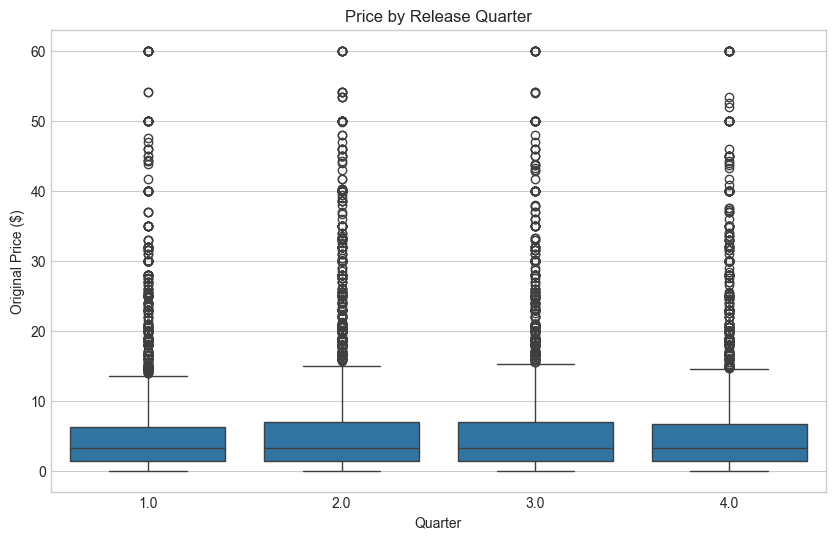

Release date features created.


In [122]:
# Process Release Date (already converted to datetime above)
# Create more temporal features
df['Release Quarter'] = df['Release Date'].dt.quarter
df['Release Day_of_Week'] = df['Release Date'].dt.dayofweek
df['Is_Holiday_Release'] = ((df['Release Month'] == 11) | (df['Release Month'] == 12)).astype(int)

# Visualize price by release quarter
plt.figure(figsize=(10, 6))
sns.boxplot(x='Release Quarter', y='Original Price', data=df)
plt.title('Price by Release Quarter')
plt.xlabel('Quarter')
plt.ylabel('Original Price ($)')
plt.show()

print("Release date features created.")

### 3.5 Game Description Text Processing

In [123]:
# Process Game Description using TF-IDF
if 'Game Description' in df.columns:
    # Fill missing descriptions
    df['Game Description'] = df['Game Description'].fillna('')
    
    # TF-IDF vectorization
    tfidf = TfidfVectorizer(max_features=100, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['Game Description'])
    
    # Convert to DataFrame
    tfidf_df = pd.DataFrame(
        tfidf_matrix.toarray(), 
        columns=[f'desc_{w}' for w in tfidf.get_feature_names_out()]
    )
    
    # Add description length as a feature
    df['Description_Length'] = df['Game Description'].apply(len)
    
    print(f"Created {tfidf_df.shape[1]} TF-IDF features from Game Description.")
    # We'll add these features to the final dataset later

Created 100 TF-IDF features from Game Description.


### 3.6 Review Columns

In [124]:
# Create Review-based features

# Process Recent Reviews Summary if it exists
if 'Recent Reviews Summary' in df.columns:
    # Map review categories to numeric values
    review_mapping = {
        'Overwhelmingly Positive': 5,
        'Very Positive': 4,
        'Mostly Positive': 3,
        'Mixed': 2,
        'Negative': 1,
        'Very Negative': 0,
        'Overwhelmingly Negative': 0
    }
    
    # Apply mapping
    df['Recent_Reviews_Score'] = df['Recent Reviews Summary'].map(review_mapping).fillna(2.5)  # Fill missing with neutral score
    print("Recent Reviews Summary converted to numeric score.")

# Process All Reviews Summary (only if we decide to keep it despite high missing values)
if 'All Reviews Summary' in df.columns and (df['All Reviews Summary'].isnull().mean() < 0.9):  # Keep if < 90% missing
    df['All_Reviews_Score'] = df['All Reviews Summary'].map(review_mapping).fillna(2.5)
    print("All Reviews Summary converted to numeric score.")
else:
    print("Dropping All Reviews Summary due to high missing values.")

# Process Recent Reviews Number
if 'Recent Reviews Number' in df.columns:
    df['Recent Reviews Number'] = pd.to_numeric(df['Recent Reviews Number'], errors='coerce').fillna(0)
    
    # Log transform to handle skewness
    df['Recent Reviews Number_Log'] = np.log1p(df['Recent Reviews Number'])
    print("Recent Reviews Number processed and log-transformed.")

# Drop All Reviews Number due to high missing values
if 'All Reviews Number' in df.columns:
    print("Dropping All Reviews Number due to high missing values.")

Recent Reviews Summary converted to numeric score.
Dropping All Reviews Summary due to high missing values.
Recent Reviews Number processed and log-transformed.


### 3.7 Developer and Publisher

In [125]:
# Process Developer and Publisher columns

def process_entity_column(df, column_name, threshold=5):
    """Process high-cardinality categorical columns like Developer and Publisher."""
    # Fill missing values
    df[column_name] = df[column_name].fillna('Unknown')
    
    # Get value counts
    value_counts = df[column_name].value_counts()
    
    # Group rare categories
    rare_entities = value_counts[value_counts < threshold].index
    df[f'{column_name}_grouped'] = df[column_name].apply(lambda x: 'Other' if x in rare_entities else x)
    
    # Frequency encoding
    df[f'{column_name}_freq'] = df[column_name].map(df[column_name].value_counts(normalize=True))
    
    # Average price by entity
    price_by_entity = df.groupby(column_name)['Original Price'].mean().to_dict()
    df[f'{column_name}_avg_price'] = df[column_name].map(price_by_entity)
    
    # Fill missing with global average
    df[f'{column_name}_avg_price'] = df[f'{column_name}_avg_price'].fillna(df['Original Price'].mean())
    
    print(f"Processed {column_name}: created grouped column, frequency encoding, and average price features.")

# Apply to Developer and Publisher
process_entity_column(df, 'Developer', threshold=10)
process_entity_column(df, 'Publisher', threshold=10)

# Show the top 10 developers by count
print("\nTop 10 Developers by count:")
print(df['Developer_grouped'].value_counts().head(10))

Processed Developer: created grouped column, frequency encoding, and average price features.
Processed Publisher: created grouped column, frequency encoding, and average price features.

Top 10 Developers by count:
Developer_grouped
Other                       62622
Unknown                       213
Choice of Games               162
Creobit                       136
Laush Dmitriy Sergeevich      119
Boogygames Studios            106
Sokpop Collective             101
Hosted Games                  100
Reforged Group                 95
Elephant Games                 77
Name: count, dtype: int64


### 3.8 Supported Languages

In [126]:
# Process Supported Languages
if 'Supported Languages' in df.columns:
    # Fill missing values
    df['Supported Languages'] = df['Supported Languages'].fillna('')
    
    # Count number of supported languages
    df['Num_Languages'] = df['Supported Languages'].str.split(',').apply(lambda x: len(x) if x != [''] else 0)
    
    # Create binary features for common languages
    common_languages = ['English', 'Spanish', 'French', 'German', 'Japanese', 'Russian', 'Chinese']
    for lang in common_languages:
        df[f'supports_{lang.lower()}'] = df['Supported Languages'].str.contains(lang, case=False).astype(int)
    
    print(f"Created number of languages feature and binary features for {len(common_languages)} common languages.")

Created number of languages feature and binary features for 7 common languages.


### 3.9 Popular Tags

In [127]:
# Process Popular Tags
if 'Popular Tags' in df.columns:
    # Fill missing values
    df['Popular Tags'] = df['Popular Tags'].fillna('')
    
    # Count number of tags
    df['Num_Tags'] = df['Popular Tags'].str.split(',').apply(lambda x: len(x) if x != [''] else 0)
    
    # Use multi-hot encoding for the most common tags
    vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), binary=True, max_features=20)
    tags_matrix = vectorizer.fit_transform(df['Popular Tags'])
    
    # Get tag names and create a DataFrame
    tag_columns = [f'tag_{tag.strip()}' for tag in vectorizer.get_feature_names_out()]
    tags_df = pd.DataFrame(tags_matrix.toarray(), columns=tag_columns)
    
    # Print most common tags
    print("Most common tags encoded:")
    print(vectorizer.get_feature_names_out())
    
    # We'll add these features to the final dataset later

Most common tags encoded:
[" '2d'" " '3d'" " 'action'" " 'adventure'" " 'atmospheric'" " 'casual'"
 " 'colorful'" " 'cute'" " 'exploration'" " 'fantasy'" " 'indie'"
 " 'pixel graphics'" " 'puzzle'" " 'rpg'" " 'simulation'"
 " 'singleplayer'" " 'singleplayer']" " 'story rich'" " 'strategy'"
 "['action'"]


### 3.10 Game Features

In [128]:
# Process Game Features
if 'Game Features' in df.columns:
    # Fill missing values
    df['Game Features'] = df['Game Features'].fillna('')
    
    # Count number of features
    df['Num_Game_Features'] = df['Game Features'].str.split(',').apply(lambda x: len(x) if x != [''] else 0)
    
    # Use multi-hot encoding for the most common features
    feature_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), binary=True, max_features=15)
    features_matrix = feature_vectorizer.fit_transform(df['Game Features'])
    
    # Get feature names and create a DataFrame
    feature_columns = [f'has_{feat.strip().lower().replace(" ", "_")}' for feat in feature_vectorizer.get_feature_names_out()]
    features_df = pd.DataFrame(features_matrix.toarray(), columns=feature_columns)
    
    # Print most common game features
    print("Most common game features encoded:")
    print(feature_vectorizer.get_feature_names_out())
    
    # We'll add these features to the final dataset later

Most common game features encoded:
[" 'full controller support'" " 'full controller support']"
 " 'online pvp'" " 'partial controller support'"
 " 'partial controller support']" " 'remote play together']"
 " 'steam achievements'" " 'steam achievements']" " 'steam cloud'"
 " 'steam cloud']" " 'steam leaderboards']" " 'steam trading cards'"
 " 'tracked controller support'" "['single-player'" "['single-player']"]


### 3.11 Minimum Requirements

In [129]:
# Process Minimum Requirements
if 'Minimum Requirements' in df.columns:
    # Fill missing values
    df['Minimum Requirements'] = df['Minimum Requirements'].fillna('')
    
    # Extract RAM information using regex
    def extract_ram(text):
        ram_match = re.search(r'(\d+)\s*GB RAM', str(text), re.IGNORECASE)
        if ram_match:
            return int(ram_match.group(1))
        else:
            return None
    
    # Extract CPU information (presence of i5, i7, etc.)
    def extract_cpu_class(text):
        if re.search(r'i7|Core i7', str(text), re.IGNORECASE):
            return 4  # High-end
        elif re.search(r'i5|Core i5', str(text), re.IGNORECASE):
            return 3  # Mid-high
        elif re.search(r'i3|Core i3', str(text), re.IGNORECASE):
            return 2  # Mid-range
        elif re.search(r'dual core|2 cores', str(text), re.IGNORECASE):
            return 1  # Low-end
        else:
            return 0  # Unknown
    
    # Apply extractors
    df['Min_RAM_GB'] = df['Minimum Requirements'].apply(extract_ram)
    df['CPU_Class'] = df['Minimum Requirements'].apply(extract_cpu_class)
    
    # Check for the presence of dedicated GPU requirement
    df['Requires_GPU'] = df['Minimum Requirements'].str.contains(
        r'nvidia|geforce|radeon|graphics card', 
        case=False
    ).astype(int)
    
    # Fill missing RAM values with median
    median_ram = df['Min_RAM_GB'].dropna().median() if df['Min_RAM_GB'].dropna().size > 0 else 4
    df['Min_RAM_GB'] = df['Min_RAM_GB'].fillna(median_ram)
    
    print(f"Extracted system requirements features: RAM, CPU class, and GPU requirement.")

Extracted system requirements features: RAM, CPU class, and GPU requirement.


### 3.12 Combine All Features

In [130]:
# Combine all features into a single DataFrame

# Start with base features from original dataframe
base_features = df.drop(['Link', 'All Reviews Summary', 'All Reviews Number'], axis=1, errors='ignore')

# Add TF-IDF features for Game Description if they exist
try:
    feature_df = pd.concat([base_features, tfidf_df], axis=1)
    print(f"Added {tfidf_df.shape[1]} TF-IDF features from Game Description.")
except NameError:
    feature_df = base_features
    print("No TF-IDF features to add.")

# Add tags features if they exist
try:
    feature_df = pd.concat([feature_df, tags_df], axis=1)
    print(f"Added {tags_df.shape[1]} tag features.")
except NameError:
    print("No tag features to add.")

# Add game features if they exist
try:
    feature_df = pd.concat([feature_df, features_df], axis=1)
    print(f"Added {features_df.shape[1]} game feature binary indicators.")
except NameError:
    print("No game feature binary indicators to add.")

print(f"Final feature dataset shape: {feature_df.shape}")

Added 100 TF-IDF features from Game Description.
Added 20 tag features.
Added 15 game feature binary indicators.
Final feature dataset shape: (71699, 181)


### 3.13 Handle Remaining Missing Values

In [131]:
# 3.14 Handle Remaining Null Values
print("Checking for any remaining null values in the dataset...")

# Count null values by column
null_counts = feature_df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]

if len(columns_with_nulls) > 0:
    print(f"Found null values in {len(columns_with_nulls)} columns:")
    print(columns_with_nulls)
    
    # Handle null values in numeric columns
    numeric_cols = feature_df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if feature_df[col].isnull().sum() > 0:
            # Fill with median
            median_value = feature_df[col].median()
            feature_df[col] = feature_df[col].fillna(median_value)
            print(f"Filled nulls in {col} with median: {median_value}")
    
    # Handle null values in non-numeric columns
    categorical_cols = feature_df.select_dtypes(exclude=['number']).columns
    for col in categorical_cols:
        if feature_df[col].isnull().sum() > 0:
            # Fill with mode or 'Unknown'
            if len(feature_df[col].mode()) > 0:
                mode_value = feature_df[col].mode()[0]
                feature_df[col] = feature_df[col].fillna(mode_value)
                print(f"Filled nulls in {col} with mode: {mode_value}")
            else:
                feature_df[col] = feature_df[col].fillna("Unknown")
                print(f"Filled nulls in {col} with 'Unknown'")
    
    # Verify all null values are handled
    remaining_nulls = feature_df.isnull().sum().sum()
    if remaining_nulls == 0:
        print("✓ All null values have been successfully handled.")
    else:
        print(f"⚠️ There are still {remaining_nulls} null values in the dataset.")
else:
    print("✓ No null values found in the dataset.")

# Print the final shape of the dataset
print(f"Final dataset shape: {feature_df.shape}")

Checking for any remaining null values in the dataset...
Found null values in 181 columns:
Title                                 220
Original Price                        219
Discounted Price                      219
Release Date                        10525
Game Description                      219
                                    ...  
has_'steam_leaderboards']             219
has_'steam_trading_cards'             219
has_'tracked_controller_support'      219
has_['single-player'                  219
has_['single-player']                 219
Length: 181, dtype: int64
Filled nulls in Original Price with median: 2.79
Filled nulls in Discounted Price with median: 2.69
Filled nulls in Recent Reviews Number with median: 0.0
Filled nulls in Discount Percentage with median: 0.0
Filled nulls in Release Year with median: 2020.0
Filled nulls in Release Month with median: 7.0
Filled nulls in Game Age with median: 4.0
Filled nulls in Original Price_Log with median: 1.332366019094335
Filled nu

In [132]:
feature_df.isnull().sum()/len(df) *100  # Check for any remaining missing values

Title                               0.0
Original Price                      0.0
Discounted Price                    0.0
Release Date                        0.0
Game Description                    0.0
                                   ... 
has_'steam_leaderboards']           0.0
has_'steam_trading_cards'           0.0
has_'tracked_controller_support'    0.0
has_['single-player'                0.0
has_['single-player']               0.0
Length: 181, dtype: float64

In [133]:
feature_df.head()

,Title,Original Price,Discounted Price,Release Date,Game Description,Recent Reviews Summary,Recent Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements,Discount Percentage,Release Year,Release Month,Game Age,Original Price_Log,Title_freq,Title_length,Has_Discount,Release Quarter,Release Day_of_Week,Is_Holiday_Release,Description_Length,Recent_Reviews_Score,Recent Reviews Number_Log,Developer_grouped,Developer_freq,Developer_avg_price,Publisher_grouped,Publisher_freq,Publisher_avg_price,Num_Languages,supports_english,supports_spanish,supports_french,supports_german,supports_japanese,supports_russian,supports_chinese,Num_Tags,Num_Game_Features,Min_RAM_GB,CPU_Class,Requires_GPU,desc_2d,desc_3d,desc_action,desc_adventure,desc_arcade,desc_based,desc_battle,desc_best,desc_build,desc_challenge,desc_challenging,desc_characters,desc_choose,desc_city,desc_classic,desc_collect,desc_combat,desc_control,desc_create,desc_dark,desc_defeat,desc_different,desc_discover,desc_elements,desc_enemies,desc_enemy,desc_escape,desc_evil,desc_experience,desc_explore,desc_fantasy,desc_fast,desc_fight,desc_friends,desc_fun,desc_game,desc_gameplay,desc_games,desc_help,desc_high,desc_home,desc_horror,desc_inspired,desc_journey,desc_just,desc_level,desc_levels,desc_life,desc_like,desc_make,desc_monsters,desc_multiplayer,desc_mysterious,desc_need,desc_new,desc_old,desc_online,desc_open,desc_paced,desc_person,desc_place,desc_platformer,desc_play,desc_player,desc_players,desc_power,desc_powerful,desc_puzzle,desc_puzzles,desc_real,desc_role,desc_rpg,desc_run,desc_save,desc_set,desc_shoot,desc_shooter,desc_simple,desc_simulator,desc_single,desc_skills,desc_solve,desc_space,desc_story,desc_strategy,desc_style,desc_survival,desc_survive,desc_team,desc_time,desc_try,desc_turn,desc_unique,desc_use,desc_using,desc_vr,desc_war,desc_way,desc_weapons,desc_world,tag_'2d',tag_'3d',tag_'action',tag_'adventure',tag_'atmospheric',tag_'casual',tag_'colorful',tag_'cute',tag_'exploration',tag_'fantasy',tag_'indie',tag_'pixel graphics',tag_'puzzle',tag_'rpg',tag_'simulation',tag_'singleplayer',tag_'singleplayer'],tag_'story rich',tag_'strategy',tag_['action',has_'full_controller_support',has_'full_controller_support'],has_'online_pvp',has_'partial_controller_support',has_'partial_controller_support'],has_'remote_play_together'],has_'steam_achievements',has_'steam_achievements'],has_'steam_cloud',has_'steam_cloud'],has_'steam_leaderboards'],has_'steam_trading_cards',has_'tracked_controller_support',has_['single-player',has_['single-player']
0,Baldur's Gate 3,29.99,29.99,2023-08-03,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,0.0,Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...,0.0,2023.0,8.0,1.0,3.433665,0.000014,15.0,0.0,3.0,3.0,0.0,207.0,5.0,0.0,Other,0.000112,14.05375,Other,0.000112,14.053750,13.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,20.0,6.0,8.0,3.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.363947,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.470207,0.000000,0.0,0.0,0.0,0.0,0.396875,0.0,0.0,0.396408,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.380063,0.0,0.0,0.432841,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Counter-Strike: Global Offensive,14.99,14.99,2012-08-21,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,0.0,"Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS',

## 4. Feature Selection and Correlation Analysis
Let's analyze correlations with our target variable to identify the most important features.

In [134]:
# Select numeric columns for correlation analysis
numeric_df = feature_df.select_dtypes(include=['number'])

# Calculate correlations with target
target_correlations = numeric_df.corr()['Original Price'].sort_values(ascending=False)

# Display top and bottom correlated features
print("Top 15 positively correlated features with Original Price:")
print(target_correlations.head(15))
print("\nTop 15 negatively correlated features with Original Price:")
print(target_correlations.tail(15))

Top 15 positively correlated features with Original Price:
Original Price               1.000000
Discounted Price             0.960907
Developer_avg_price          0.875574
Original Price_Log           0.840322
Publisher_avg_price          0.801891
Num_Game_Features            0.250094
supports_french              0.236841
supports_german              0.234135
supports_japanese            0.230492
supports_spanish             0.219001
Recent_Reviews_Score         0.206131
supports_chinese             0.193947
has_'steam_trading_cards'    0.191566
has_'steam_achievements'     0.149227
Title_length                 0.140392
Name: Original Price, dtype: float64

Top 15 negatively correlated features with Original Price:
desc_game                        -0.028539
desc_platformer                  -0.028623
desc_enemies                     -0.030948
Release Quarter                  -0.043620
Release Year                     -0.050717
tag_'3d'                         -0.051306
tag_'singleplaye

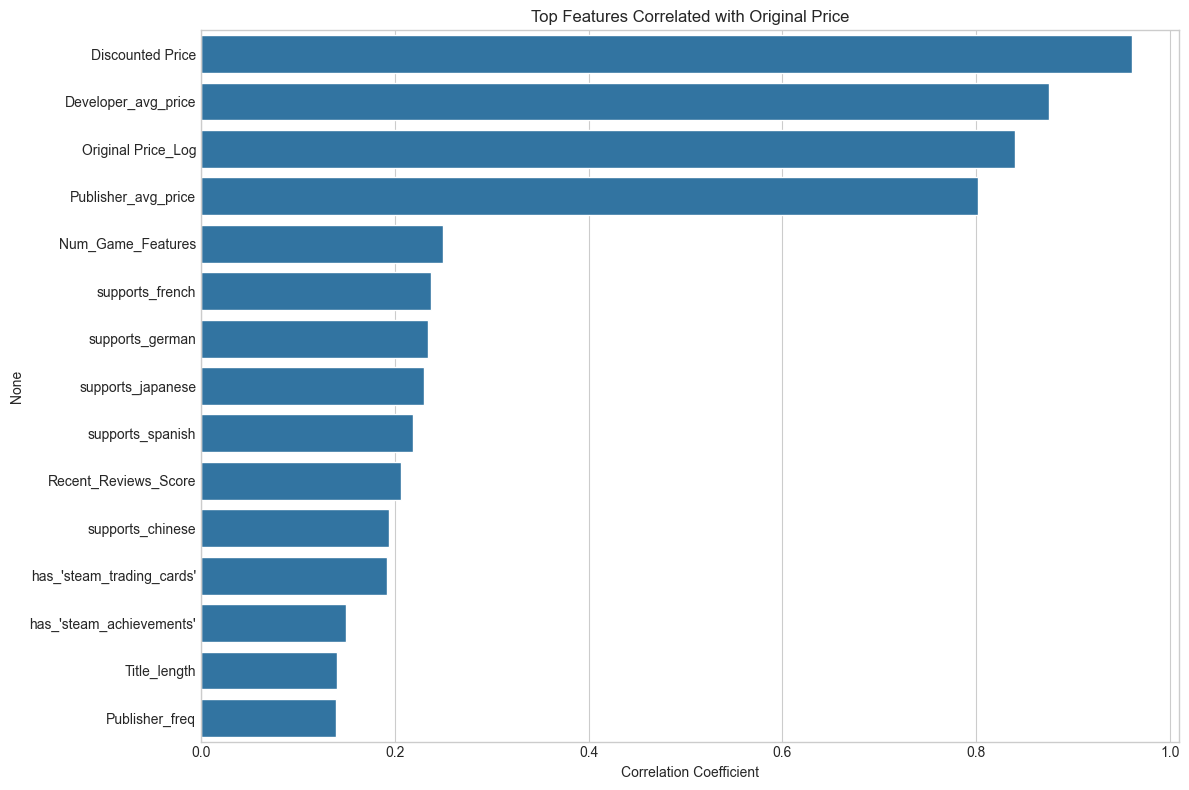

In [135]:
# Visualize top correlations
plt.figure(figsize=(12, 8))
top_corrs = target_correlations[1:16]  # Skip the target itself
sns.barplot(x=top_corrs.values, y=top_corrs.index)
plt.title('Top Features Correlated with Original Price')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

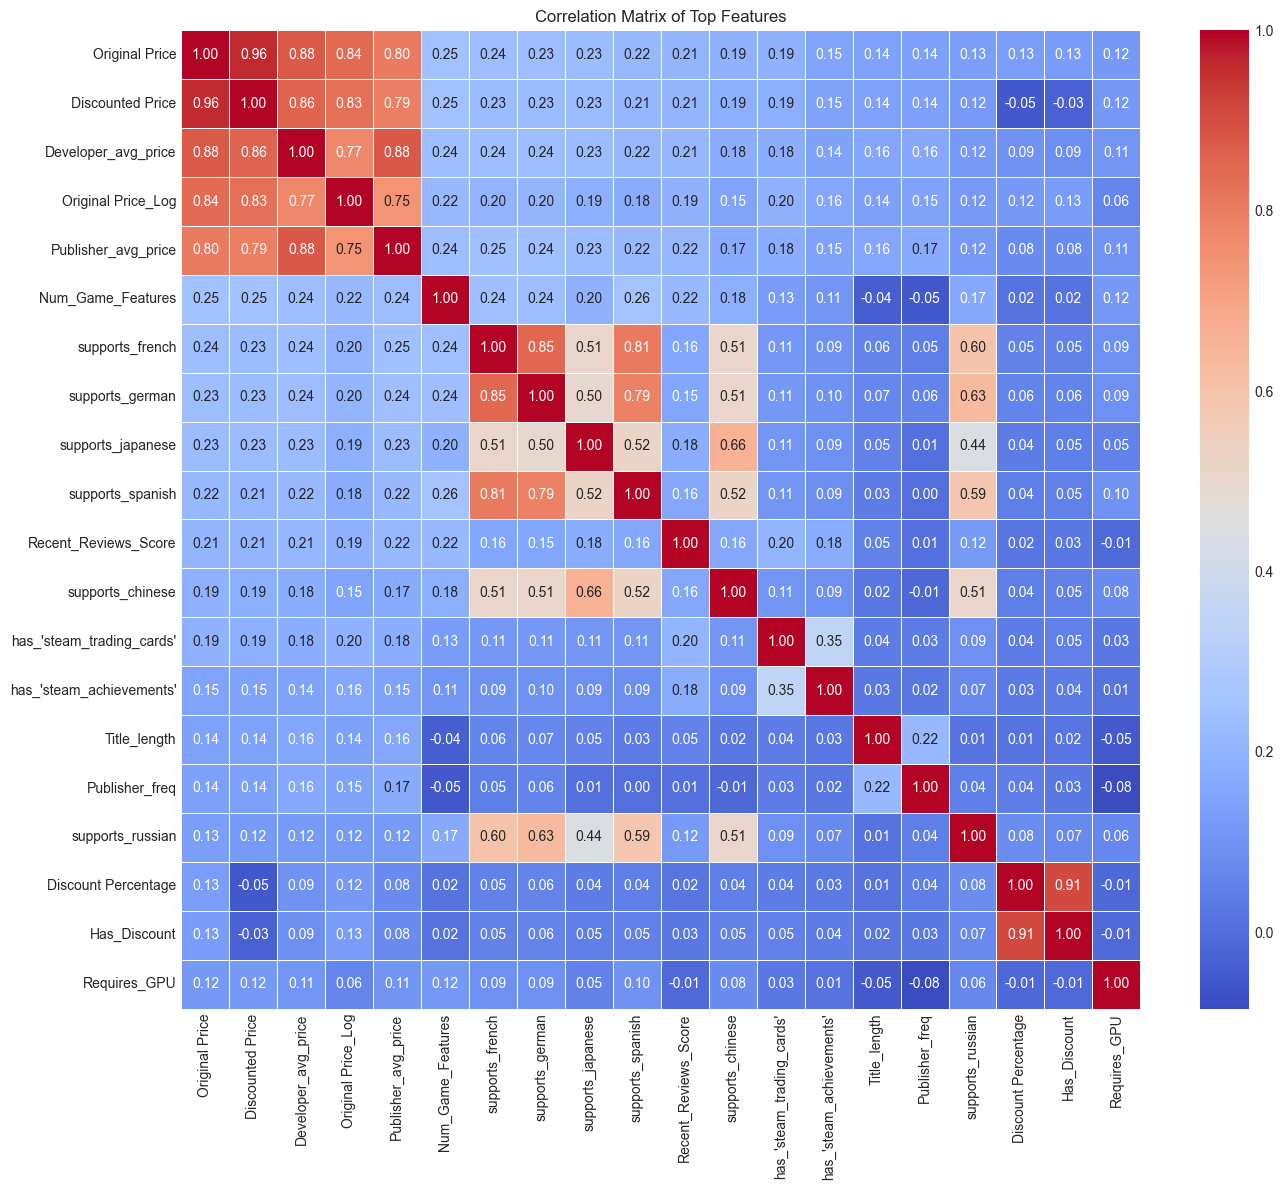

In [136]:
# Check for multicollinearity among the top features
top_features = target_correlations.head(20).index.tolist()
plt.figure(figsize=(14, 12))
sns.heatmap(
    numeric_df[top_features].corr(), 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Matrix of Top Features')
plt.tight_layout()
plt.show()

## 5. Final Dataset Preparation
Prepare the final dataset for modeling.

In [137]:
# Create a function to prepare the final dataset
def prepare_final_dataset(df, target_col='Original Price', exclude_cols=None):
    """Prepare the final dataset for modeling."""
    if exclude_cols is None:
        exclude_cols = []
    
    # Get the target
    y = df[target_col].copy()
    
    # Exclude non-predictive columns and string columns
    exclude_cols += [target_col, 'Title', 'Link', 'Game Description', 'Supported Languages', 
                     'Popular Tags', 'Game Features', 'Minimum Requirements', 'Release Date','Discounted Price', 'Discount Percentage','Original Price_Log']
    
    # Keep only numeric columns initially
    X = df.select_dtypes(include=['number']).copy()
    
    # Exclude specified columns from X
    for col in exclude_cols:
        if col in X.columns:
            X = X.drop(col, axis=1)
    
    # Get list of feature names
    feature_names = X.columns.tolist()
    
    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Final dataset shape: X_train: {X_train.shape}, X_test: {X_test.shape}")
    print(f"Number of features: {len(feature_names)}")
    
    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, feature_names, scaler

# Apply the function to our dataset
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, feature_names, scaler = prepare_final_dataset(feature_df)

Final dataset shape: X_train: (57359, 165), X_test: (14340, 165)
Number of features: 165


In [139]:
# Save the prepared data for modeling
# First create a dictionary with all necessary components
model_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'X_train_scaled': X_train_scaled,
    'X_test_scaled': X_test_scaled,
    'feature_names': feature_names,
    'scaler': scaler
}

# Uncomment to save the data
# import pickle
# with open('video_game_price_model_data.pkl', 'wb') as f:
#     pickle.dump(model_data, f)

print("Data preparation complete! The dataset is ready for modeling.")

Data preparation complete! The dataset is ready for modeling.


In [140]:
X_train.head()

,Recent Reviews Number,Release Year,Release Month,Game Age,Title_freq,Title_length,Has_Discount,Release Quarter,Release Day_of_Week,Is_Holiday_Release,Description_Length,Recent_Reviews_Score,Recent Reviews Number_Log,Developer_freq,Developer_avg_price,Publisher_freq,Publisher_avg_price,Num_Languages,supports_english,supports_spanish,supports_french,supports_german,supports_japanese,supports_russian,supports_chinese,Num_Tags,Num_Game_Features,Min_RAM_GB,CPU_Class,Requires_GPU,desc_2d,desc_3d,desc_action,desc_adventure,desc_arcade,desc_based,desc_battle,desc_best,desc_build,desc_challenge,desc_challenging,desc_characters,desc_choose,desc_city,desc_classic,desc_collect,desc_combat,desc_control,desc_create,desc_dark,desc_defeat,desc_different,desc_discover,desc_elements,desc_enemies,desc_enemy,desc_escape,desc_evil,desc_experience,desc_explore,desc_fantasy,desc_fast,desc_fight,desc_friends,desc_fun,desc_game,desc_gameplay,desc_games,desc_help,desc_high,desc_home,desc_horror,desc_inspired,desc_journey,desc_just,desc_level,desc_levels,desc_life,desc_like,desc_make,desc_monsters,desc_multiplayer,desc_mysterious,desc_need,desc_new,desc_old,desc_online,desc_open,desc_paced,desc_person,desc_place,desc_platformer,desc_play,desc_player,desc_players,desc_power,desc_powerful,desc_puzzle,desc_puzzles,desc_real,desc_role,desc_rpg,desc_run,desc_save,desc_set,desc_shoot,desc_shooter,desc_simple,desc_simulator,desc_single,desc_skills,desc_solve,desc_space,desc_story,desc_strategy,desc_style,desc_survival,desc_survive,desc_team,desc_time,desc_try,desc_turn,desc_unique,desc_use,desc_using,desc_vr,desc_war,desc_way,desc_weapons,desc_world,tag_'2d',tag_'3d',tag_'action',tag_'adventure',tag_'atmospheric',tag_'casual',tag_'colorful',tag_'cute',tag_'exploration',tag_'fantasy',tag_'indie',tag_'pixel graphics',tag_'puzzle',tag_'rpg',tag_'simulation',tag_'singleplayer',tag_'singleplayer'],tag_'story rich',tag_'strategy',tag_['action',has_'full_controller_support',has_'full_controller_support'],has_'online_pvp',has_'partial_controller_support',has_'partial_controller_support'],has_'remote_play_together'],has_'steam_achievements',has_'steam_achievements'],has_'steam_cloud',has_'steam_cloud'],has_'steam_leaderboards'],has_'steam_trading_cards',has_'tracked_controller_support',has_['single-player',has_['single-player']
3082,0.0,2020.0,1.0,5.0,0.000014,46.0,0.0,1.0,1.0,0.0,308.0,4.0,0.0,0.000853,31.428197,0.000867,32.288710,4.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.857251,0.0,0.0,0.514899,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
21926,0.0,2017.0,1.0,8.0,0.000014,16.0,0.0,1.0,1.0,0.0,295.0,2.5,0.0,0.000042,1.860000,0.000042,1.860000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508716,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.494998,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.534636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
50411,0.0,2023.0,4.0,2.0,0.000014,19.0,0.0,2.0,4.0,0.0,251.0,2.5,0.0,0.000014,3.290000,0.000014,3.290000,2.0,1.0,1.0,0.0,0.0,0.0

In [142]:
# Convert scaled array back to a DataFrame with feature names
pd.DataFrame(X_train_scaled, columns=feature_names).head()

,Recent Reviews Number,Release Year,Release Month,Game Age,Title_freq,Title_length,Has_Discount,Release Quarter,Release Day_of_Week,Is_Holiday_Release,Description_Length,Recent_Reviews_Score,Recent Reviews Number_Log,Developer_freq,Developer_avg_price,Publisher_freq,Publisher_avg_price,Num_Languages,supports_english,supports_spanish,supports_french,supports_german,supports_japanese,supports_russian,supports_chinese,Num_Tags,Num_Game_Features,Min_RAM_GB,CPU_Class,Requires_GPU,desc_2d,desc_3d,desc_action,desc_adventure,desc_arcade,desc_based,desc_battle,desc_best,desc_build,desc_challenge,desc_challenging,desc_characters,desc_choose,desc_city,desc_classic,desc_collect,desc_combat,desc_control,desc_create,desc_dark,desc_defeat,desc_different,desc_discover,desc_elements,desc_enemies,desc_enemy,desc_escape,desc_evil,desc_experience,desc_explore,desc_fantasy,desc_fast,desc_fight,desc_friends,desc_fun,desc_game,desc_gameplay,desc_games,desc_help,desc_high,desc_home,desc_horror,desc_inspired,desc_journey,desc_just,desc_level,desc_levels,desc_life,desc_like,desc_make,desc_monsters,desc_multiplayer,desc_mysterious,desc_need,desc_new,desc_old,desc_online,desc_open,desc_paced,desc_person,desc_place,desc_platformer,desc_play,desc_player,desc_players,desc_power,desc_powerful,desc_puzzle,desc_puzzles,desc_real,desc_role,desc_rpg,desc_run,desc_save,desc_set,desc_shoot,desc_shooter,desc_simple,desc_simulator,desc_single,desc_skills,desc_solve,desc_space,desc_story,desc_strategy,desc_style,desc_survival,desc_survive,desc_team,desc_time,desc_try,desc_turn,desc_unique,desc_use,desc_using,desc_vr,desc_war,desc_way,desc_weapons,desc_world,tag_'2d',tag_'3d',tag_'action',tag_'adventure',tag_'atmospheric',tag_'casual',tag_'colorful',tag_'cute',tag_'exploration',tag_'fantasy',tag_'indie',tag_'pixel graphics',tag_'puzzle',tag_'rpg',tag_'simulation',tag_'singleplayer',tag_'singleplayer'],tag_'story rich',tag_'strategy',tag_['action',has_'full_controller_support',has_'full_controller_support'],has_'online_pvp',has_'partial_controller_support',has_'partial_controller_support'],has_'remote_play_together'],has_'steam_achievements',has_'steam_achievements'],has_'steam_cloud',has_'steam_cloud'],has_'steam_leaderboards'],has_'steam_trading_cards',has_'tracked_controller_support',has_['single-player',has_['single-player']
0,0.0,0.173863,-1.807176,0.094017,8.470329e-21,2.831286,-0.191692,-1.547255,-1.045349,-0.398163,1.427387,2.017213,0.0,2.827416,5.690964,0.633179,6.411860,-0.041810,0.051034,-0.561867,-0.571908,-0.581249,1.997258,-0.546709,1.790395,-0.931354,-0.024289,-0.011567,1.567530,1.139759,-0.196548,-0.160615,-0.301338,-0.311151,-0.182521,-0.258077,-0.1978,-0.145446,-0.211189,-0.142227,-0.160009,-0.158013,-0.145761,-0.165086,-0.182778,-0.177942,-0.180654,-0.179729,-0.159904,-0.166295,-0.155995,-0.201649,-0.167842,-0.162914,-0.229601,-0.139858,-0.16979,-0.155550,-0.236842,-0.255647,-0.15928,-0.195281,-0.248053,-0.208875,-0.174164,-0.638950,-0.160844,-0.182112,-0.201083,-0.138398,-0.138765,-0.193761,-0.162469,-0.17826,-0.153394,-0.157281,-0.19784,-0.194352,-0.201754,-0.205817,-0.164598,-0.184385,-0.161618,-0.159109,-0.279326,-0.147473,-0.15437,-0.157572,-0.166428,-0.210876,-0.14973,-0.210255,-0.298109,-0.216295,-0.227066,-0.150245,-0.146325,-0.249036,-0.201165,-0.158846,-0.14247,-0.216482,-0.140201,-0.188794,-0.219105,-0.13792,-0.225084,-0.144988,-0.138021,-0.143352,-0.165881,-0.182494,-0.189774,-0.236207,-0.191175,-0.180856,-0.183112,-0.207238,-0.146956,-0.253888,-0.157781,-0.178229,-0.227371,-0.209944,-0.150891,-0.1842,9.098207,-0.262059,-0.174792,2.932417,-0.645272,-0.494852,1.587394,1.500425,2.079383,-0.639964,-0.443818,-0.395750,-0.402911,-0.392857,-0.876850,-0.426103,-0.436537,-0.398104,-0.432653,1.138870,-0.391378,-0.409464,-0.419341,-0.453882,-0.437244,-0.303985,-0.264067,-0.256082,-0.290082,-0.304087,-0.782348,-0.330553,-0.322346,2.383549,-0.262135,-0.332561,-0.256623,0.636691,-0.562995
1,0.0,-0.936263,-1.807176,1.199164,8.470329e-21,-0.151386,-0.19

In [144]:
# Show the first 10 feature names
feature_names[:10]

['Recent Reviews Number',
 'Release Year',
 'Release Month',
 'Game Age',
 'Title_freq',
 'Title_length',
 'Has_Discount',
 'Release Quarter',
 'Release Day_of_Week',
 'Is_Holiday_Release']

##  Training Different Regression Models

In [145]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define evaluation metrics function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluate a model using multiple metrics."""
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

### Create and Train Multiple Models

In [146]:
# Create a dictionary of regression models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
    # SVR is commented out as it may be too slow on large datasets
    # 'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    
    # Add training time
    training_time = time.time() - start_time
    metrics['training_time'] = training_time
    
    # Store results
    results[name] = metrics
    
    print(f"  Done! Training time: {training_time:.2f} seconds")
    print(f"  Test RMSE: {metrics['test_rmse']:.4f}, R²: {metrics['test_r2']:.4f}")
    print()

Training Linear Regression...
  Done! Training time: 0.50 seconds
  Test RMSE: 2.6519, R²: 0.7729

Training Ridge...
  Done! Training time: 0.10 seconds
  Test RMSE: 2.6519, R²: 0.7729

Training Lasso...
  Done! Training time: 0.57 seconds
  Test RMSE: 2.6665, R²: 0.7703

Training ElasticNet...
  Done! Training time: 0.52 seconds
  Test RMSE: 2.6806, R²: 0.7679

Training Random Forest...
  Done! Training time: 145.43 seconds
  Test RMSE: 2.4091, R²: 0.8125

Training Gradient Boosting...
  Done! Training time: 22.52 seconds
  Test RMSE: 2.5036, R²: 0.7975

Training XGBoost...
  Done! Training time: 1.29 seconds
  Test RMSE: 2.3686, R²: 0.8188

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26834
[LightGBM] [Info] Number of data points in the train set: 57359, number of used features: 162
[LightGBM] [Info] Start training from

### Compare Model Performance

In [147]:
# Create a DataFrame to compare model results
results_df = pd.DataFrame()

for name, metrics in results.items():
    row = pd.Series({
        'Model': name,
        'Train RMSE': metrics['train_rmse'],
        'Test RMSE': metrics['test_rmse'],
        'Train MAE': metrics['train_mae'],
        'Test MAE': metrics['test_mae'],
        'Train R²': metrics['train_r2'],
        'Test R²': metrics['test_r2'],
        'Time (sec)': metrics['training_time']
    })
    results_df = pd.concat([results_df, row.to_frame().T], ignore_index=True)

# Sort by Test RMSE (lower is better)
results_df = results_df.sort_values('Test RMSE')
results_df

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²,Time (sec)
7,LightGBM,1.741966,2.296962,0.836012,0.96473,0.897053,0.829585,1.200722
6,XGBoost,1.505034,2.368599,0.788899,1.036478,0.923153,0.81879,1.289407
4,Random Forest,0.84436,2.409117,0.339094,0.927059,0.975813,0.812537,145.429981
5,Gradient Boosting,2.225581,2.50357,1.055873,1.118254,0.831957,0.797549,22.524047
0,Linear Regression,2.513271,2.65188,1.225846,1.262662,0.785705,0.772853,0.504959
1,Ridge,2.513271,2.651891,1.225819,1.262638,0.785705,0.772851,0.100749
2,Lasso,2.540218,2.666476,1.133079,1.166342,0.781086,0.770345,0.574347
3,ElasticNet,2.54224,2.680598,1.195933,1.230836,0.780737,0.767906,0.519204
8,KNN,3.48441,4.433935,2.31275,2.870064,0.588101,0.364993,12.52585


### Checking for Overfitting or Underfitting in  Model

#### 1. Compare Training vs. Testing Metrics


In [149]:
# Add this code after your model training section
def check_model_fit(results):
    """Analyze whether models are overfitting or underfitting"""
    fit_analysis = pd.DataFrame()
    
    for name, metrics in results.items():
        train_rmse = metrics['train_rmse']
        test_rmse = metrics['test_rmse']
        train_r2 = metrics['train_r2']
        test_r2 = metrics['test_r2']
        
        # Calculate performance gaps
        rmse_gap = train_rmse - test_rmse
        r2_gap = train_r2 - test_r2
        rmse_gap_percent = (rmse_gap / train_rmse) * 100 if train_rmse != 0 else 0
        
        # Determine fit status
        if train_r2 > 0.95 and test_r2 < 0.85 and r2_gap > 0.1:
            fit_status = "Overfitting"
        elif train_r2 < 0.7 and test_r2 < 0.7:
            fit_status = "Underfitting"
        else:
            fit_status = "Good fit"
        
        row = pd.Series({
            'Model': name,
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
            'RMSE Gap': rmse_gap,
            'RMSE Gap %': rmse_gap_percent,
            'Train R²': train_r2,
            'Test R²': test_r2,
            'R² Gap': r2_gap,
            'Fit Status': fit_status
        })
        fit_analysis = pd.concat([fit_analysis, row.to_frame().T], ignore_index=True)
    
    return fit_analysis.sort_values('R² Gap', ascending=False)

# Apply the function to your results
fit_analysis = check_model_fit(results)
fit_analysis

,Model,Train RMSE,Test RMSE,RMSE Gap,RMSE Gap %,Train R²,Test R²,R² Gap,Fit Status
8,KNN,3.48441,4.433935,-0.949526,-27.250688,0.588101,0.364993,0.223108,Underfitting
4,Random Forest,0.84436,2.409117,-1.564757,-185.318711,0.975813,0.812537,0.163276,Overfitting
6,XGBoost,1.505034,2.368599,-0.863565,-57.378435,0.923153,0.81879,0.104364,Good fit
7,LightGBM,1.741966,2.296962,-0.554996,-31.860342,0.897053,0.829585,0.067468,Good fit
5,Gradient Boosting,2.225581,2.50357,-0.27799,-12.490651,0.831957,0.797549,0.034408,Good fit
1,Ridge,2.513271,2.651891,-0.138619,-5.515488,0.785705,0.772851,0.012854,Good fit
0,Linear Regression,2.513271,2.65188,-0.138609,-5.515085,0.785705,0.772853,0.012853,Good fit
3,ElasticNet,2.54224,2.680598,-0.138358,-5.44237,0.780737,0.767906,0.01283,Good fit
2,Lasso,2.540218,2.666476,-0.126258,-4.97036,0.781086,0.770345,0.01074,Good fit


#### 2. Visualize the Fit

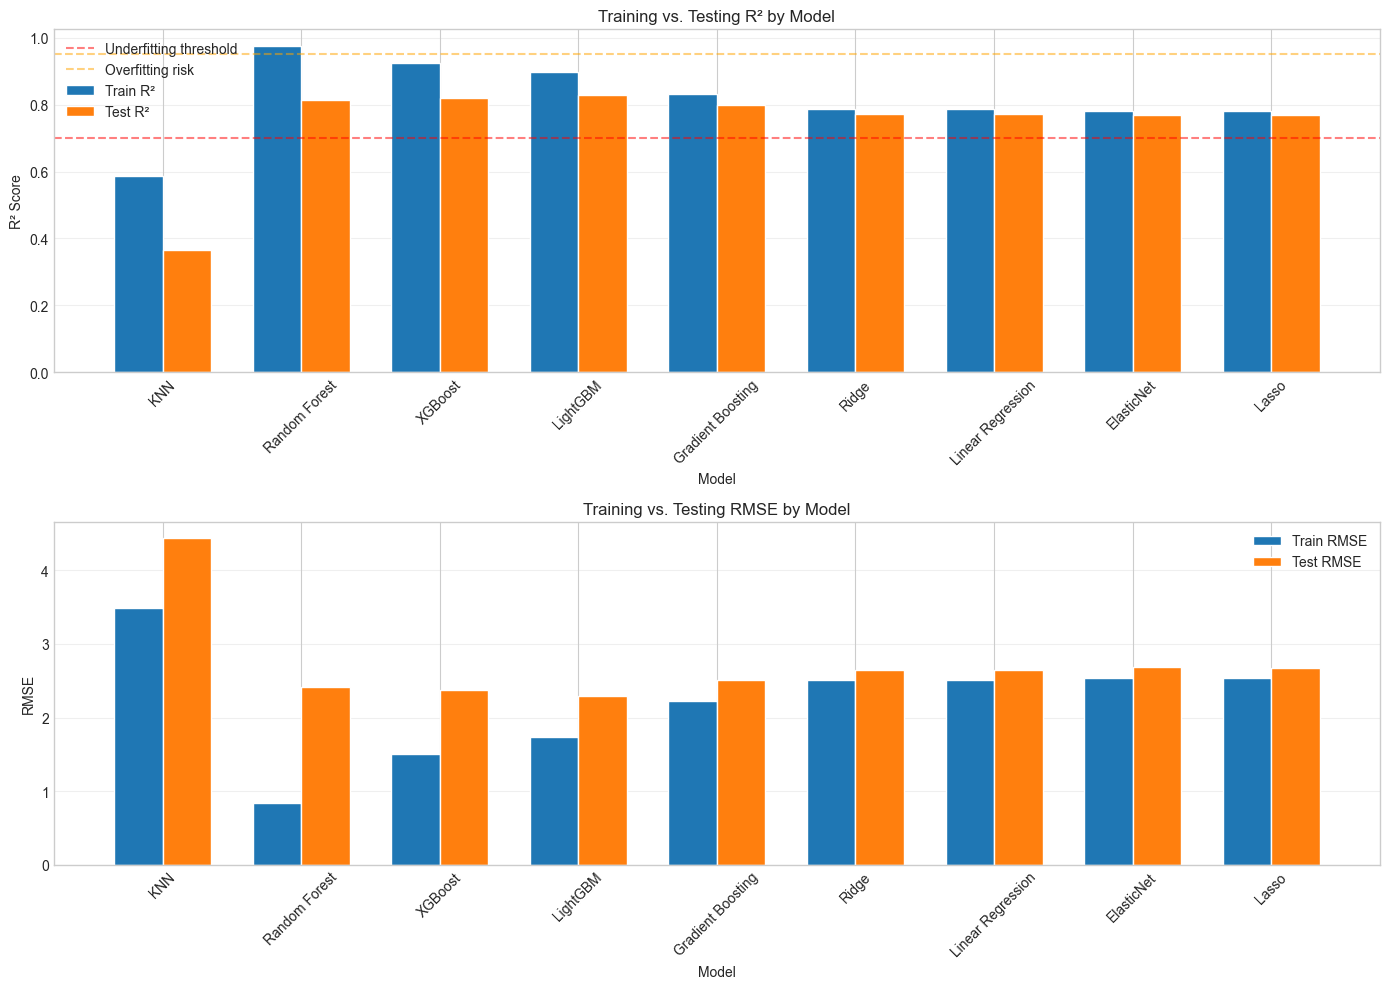


Model Fit Status Summary:
Good fit: 7 models
Underfitting: 1 models
Overfitting: 1 models


In [150]:
# Visualize the fit status of each model
plt.figure(figsize=(14, 10))

# Plot R² comparison
plt.subplot(2, 1, 1)
models = fit_analysis['Model'].values
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, fit_analysis['Train R²'], width, label='Train R²')
plt.bar(x + width/2, fit_analysis['Test R²'], width, label='Test R²')
plt.axhline(y=0.7, color='r', linestyle='--', alpha=0.5, label='Underfitting threshold')
plt.axhline(y=0.95, color='orange', linestyle='--', alpha=0.5, label='Overfitting risk')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Training vs. Testing R² by Model')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot RMSE comparison
plt.subplot(2, 1, 2)
plt.bar(x - width/2, fit_analysis['Train RMSE'], width, label='Train RMSE')
plt.bar(x + width/2, fit_analysis['Test RMSE'], width, label='Test RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Training vs. Testing RMSE by Model')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Count models by fit status
fit_counts = fit_analysis['Fit Status'].value_counts()
print("\nModel Fit Status Summary:")
for status, count in fit_counts.items():
    print(f"{status}: {count} models")

### Visualize Model Performance

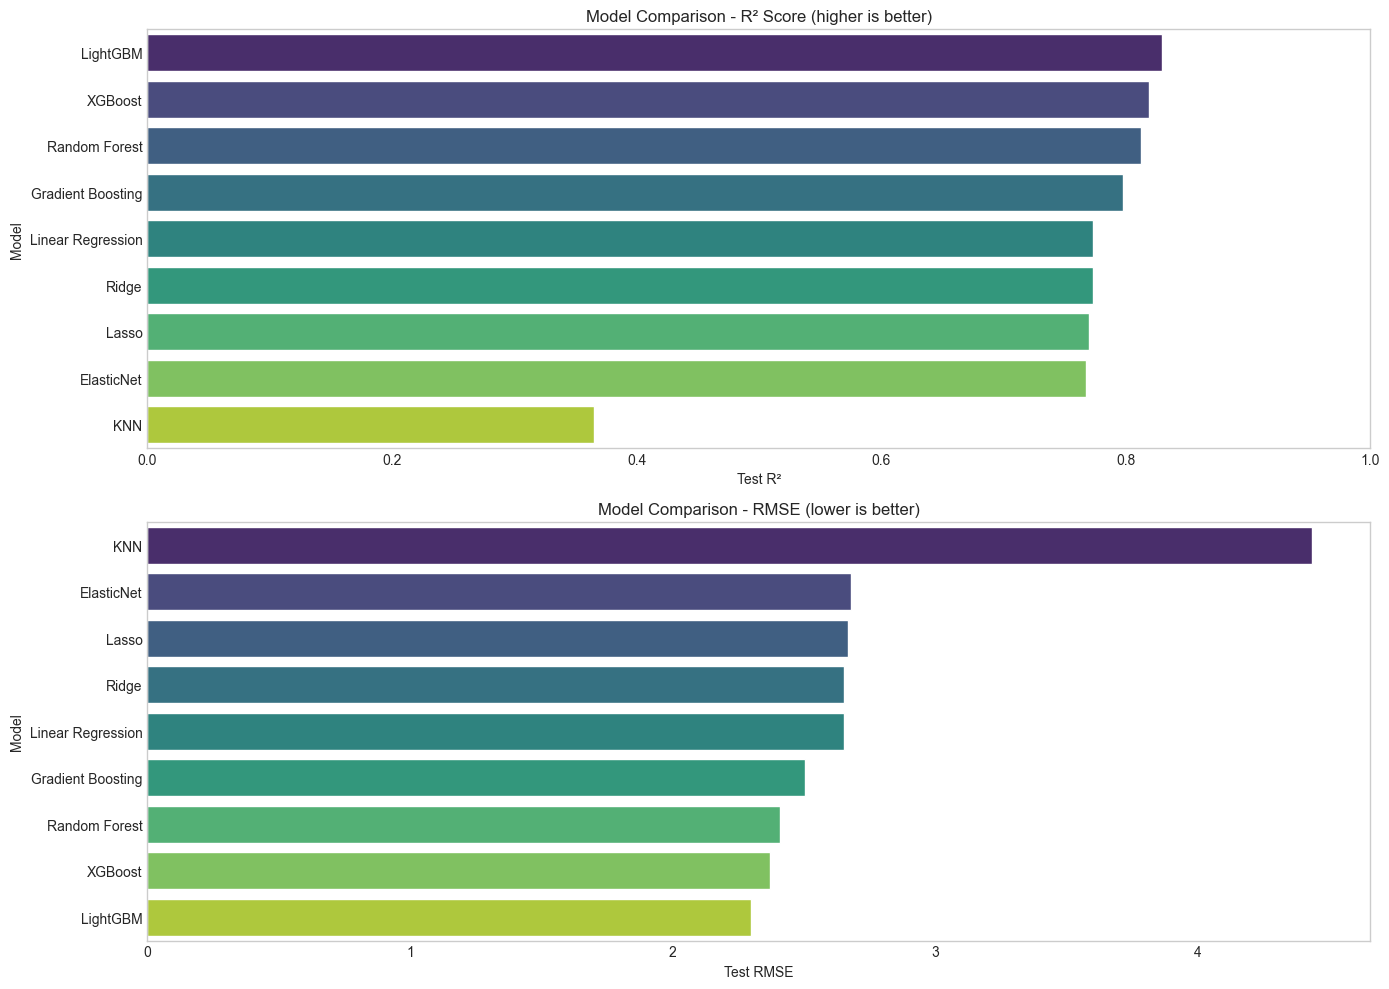

In [151]:
# Visualize model performance
plt.figure(figsize=(14, 10))

# R² scores
plt.subplot(2, 1, 1)
sns.barplot(x='Test R²', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison - R² Score (higher is better)')
plt.xlim(0, 1)
plt.grid(axis='x')

# RMSE scores
plt.subplot(2, 1, 2)
sns.barplot(x='Test RMSE', y='Model', data=results_df.sort_values('Test RMSE', ascending=False), palette='viridis')
plt.title('Model Comparison - RMSE (lower is better)')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

### Analyze Best Model

In [152]:
# First, let's verify what models actually is
print(f"Type of models: {type(models)}")

# If models is not a dictionary or is empty, let's recreate it
if not isinstance(models, dict) or len(models) == 0:
    print("Recreating models dictionary...")
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
        'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
        'KNN': KNeighborsRegressor(n_neighbors=5)
    }

Type of models: <class 'numpy.ndarray'>
Recreating models dictionary...


Best model from results: LightGBM
Using LightGBM with test RMSE: 2.2970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26834
[LightGBM] [Info] Number of data points in the train set: 57359, number of used features: 162
[LightGBM] [Info] Start training from score 4.264077


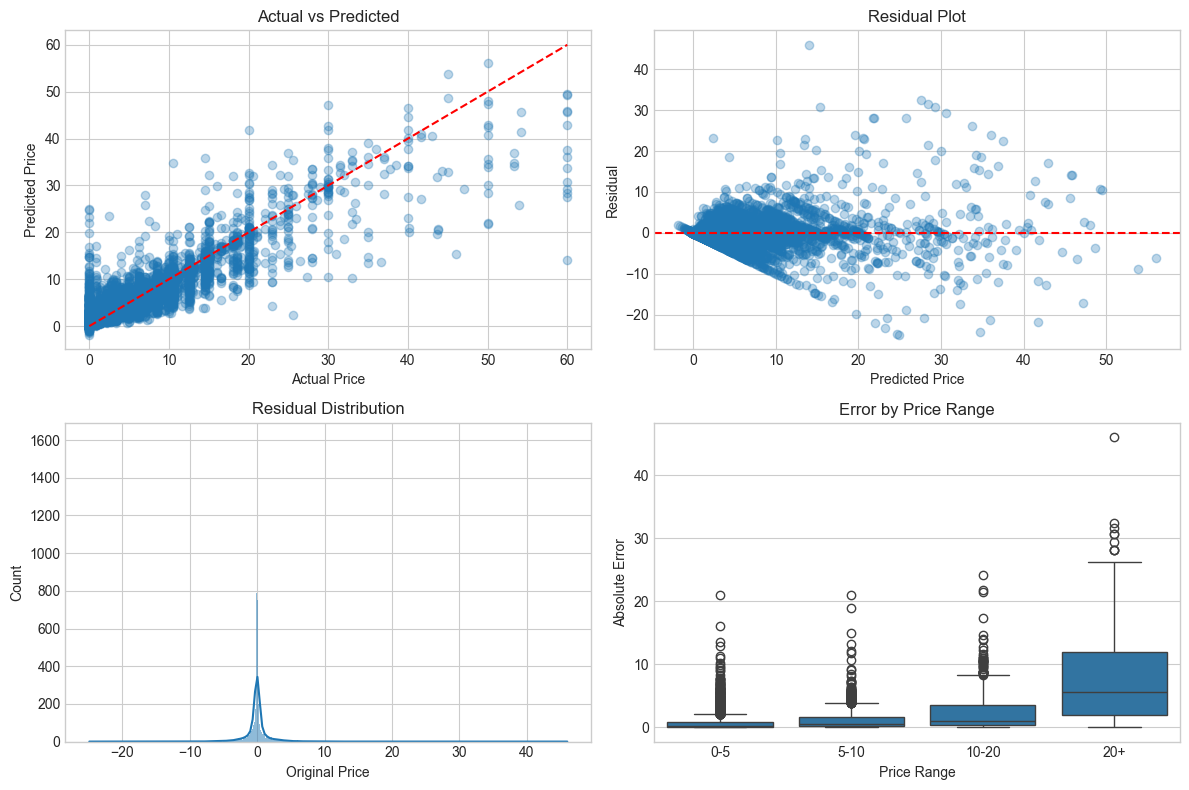

In [153]:
# Get the best model name and object
best_model_name = "Random Forest"  # Default fallback
best_model = None

try:
    # Try to get the best model name from results DataFrame
    if isinstance(results_df, pd.DataFrame) and not results_df.empty:
        best_model_name = str(results_df.iloc[0]['Model']).strip()
        print(f"Best model from results: {best_model_name}")
    
    # Try to get the model directly from results (which should be the original dictionary)
    if isinstance(results, dict) and best_model_name in results:
        metrics = results[best_model_name]
        print(f"Using {best_model_name} with test RMSE: {metrics['test_rmse']:.4f}")
    
    # If models is a proper dictionary, try to get the model
    if isinstance(models, dict) and best_model_name in models:
        best_model = models[best_model_name]
    else:
        # Find the model with best performance in results
        best_test_rmse = float('inf')
        for name, metrics in results.items():
            if metrics['test_rmse'] < best_test_rmse:
                best_test_rmse = metrics['test_rmse']
                best_model_name = name
        
        # Recreate the model based on the name
        if best_model_name == 'Random Forest':
            best_model = RandomForestRegressor(n_estimators=100, random_state=42)
        elif best_model_name == 'XGBoost':
            best_model = XGBRegressor(n_estimators=100, random_state=42)
        elif best_model_name == 'Gradient Boosting':
            best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
        elif best_model_name == 'LightGBM':
            best_model = LGBMRegressor(n_estimators=100, random_state=42)
        else:
            # Default to Random Forest if name doesn't match
            best_model = RandomForestRegressor(n_estimators=100, random_state=42)
            best_model_name = 'Random Forest'
            
    # If we still don't have a model, create a new Random Forest
    if best_model is None:
        print("Falling back to a new Random Forest model")
        best_model = RandomForestRegressor(n_estimators=100, random_state=42)
        best_model_name = 'Random Forest'
        
    # Make sure the model is trained
    best_model.fit(X_train_scaled, y_train)
        
    # Now continue with predictions and visualization
    y_pred = best_model.predict(X_test_scaled)
    
    # Visualize actual vs predicted prices
    plt.figure(figsize=(12, 8))
    
    # Scatter plot
    plt.subplot(2, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    
    # Residual plot
    plt.subplot(2, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residual')
    
    # Residual distribution
    plt.subplot(2, 2, 3)
    sns.histplot(residuals, kde=True)
    plt.title('Residual Distribution')
    
    # Error distribution by price range
    plt.subplot(2, 2, 4)
    price_ranges = pd.cut(y_test, bins=[0, 5, 10, 20, float('inf')], labels=['0-5', '5-10', '10-20', '20+'])
    error_by_range = pd.DataFrame({'Price Range': price_ranges, 'Absolute Error': np.abs(residuals)})
    sns.boxplot(x='Price Range', y='Absolute Error', data=error_by_range)
    plt.title('Error by Price Range')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in visualization: {e}")
    import traceback
    traceback.print_exc()

### Hyperparameter Tuning

In [154]:
# Import libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameters to tune based on the best model
if best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'LightGBM':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [31, 50, 100],
        'min_child_samples': [20, 30, 50]
    }
elif 'Linear' in best_model_name or 'Ridge' in best_model_name or 'Lasso' in best_model_name or 'ElasticNet' in best_model_name:
    param_grid = {
        'fit_intercept': [True, False]
    }
    # Add alpha parameter for regularized models
    if best_model_name != 'Linear Regression':
        param_grid['alpha'] = [0.001, 0.01, 0.1, 1.0, 10.0]
    # Add l1_ratio for ElasticNet
    if best_model_name == 'ElasticNet':
        param_grid['l1_ratio'] = [0.1, 0.5, 0.7, 0.9]
elif best_model_name == 'KNN':
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
    }
else:
    param_grid = {}
    print(f"No hyperparameter grid defined for {best_model_name}")

# Only run hyperparameter tuning if a param_grid is defined
if param_grid:
    print(f"Fine-tuning {best_model_name} using RandomizedSearchCV...")
    
    # Use RandomizedSearchCV for faster processing
    search = RandomizedSearchCV(
        best_model, 
        param_grid, 
        n_iter=10,  # Number of parameter settings sampled
        scoring='neg_mean_squared_error',
        cv=3,  # Number of cross-validation folds
        verbose=1,
        random_state=42,
        n_jobs=-1  # Use all available cores
    )
    
    # Fit the search
    search.fit(X_train_scaled, y_train)
    
    # Get the best parameters and score
    print(f"\nBest parameters: {search.best_params_}")
    print(f"Best RMSE: {np.sqrt(-search.best_score_):.4f}")
    
    # Train model with best parameters
    best_model = search.best_estimator_
    
    # Evaluate the tuned model
    tuned_metrics = evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test)
    print(f"\nTuned model performance:")
    print(f"  Train RMSE: {tuned_metrics['train_rmse']:.4f}")
    print(f"  Test RMSE: {tuned_metrics['test_rmse']:.4f}")
    print(f"  Train R²: {tuned_metrics['train_r2']:.4f}")
    print(f"  Test R²: {tuned_metrics['test_r2']:.4f}")

Fine-tuning LightGBM using RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26834
[LightGBM] [Info] Number of data points in the train set: 57359, number of used features: 162
[LightGBM] [Info] Start training from score 4.264077

Best parameters: {'num_leaves': 50, 'n_estimators': 200, 'min_child_samples': 20, 'learning_rate': 0.05}
Best RMSE: 2.1884

Tuned model performance:
  Train RMSE: 1.5930
  Test RMSE: 2.2850
  Train R²: 0.9139
  Test R²: 0.8314


### Save the Final Model

In [156]:
# Save the model, scaler, and feature names
import joblib

# Create a dictionary with all necessary components for prediction
model_artifacts = {
    'model': best_model,
    'scaler': scaler,
    'feature_names': feature_names
}

# Save to disk
joblib.dump(model_artifacts, 'game_price_prediction_model.joblib')

print("Model artifacts saved successfully as 'game_price_prediction_model.joblib'")

Model artifacts saved successfully as 'game_price_prediction_model.joblib'
